# Маркетинговое исследование развлекательного приложения Procrastinate Pro+.

**Описание проекта:** Я маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Компания терпит убытки, несмотря на огромные вложения в рекламу.

**Описание данных:** В моем распоряжении три датасета:
- visits_info_short.csv хранит лог сервера с информацией о посещениях сайта,
- orders_info_short.csv — информацию о заказах,
- costs_info_short.csv — информацию о расходах на рекламу.

**Цель исследования:** Разобраться в причинах неэффективности привлечения пользователей, помочь компании выйти в плюс и сформулировать рекомендации для отдела маркетинга.

**Ход исследования:** 
- Подготовка данных: загрузка данных и изучение общей информации, приведение названия столбцов к нижнему регистру, проверка пропусков, приведение данных к нужному типу.
- Задание функций для расчетов: расписывание функций для создания и визуализации данных.
- Исследовательский анализ данных: описание и визуализирование общей информации о пользователях.
- Маркетинг: определение и визуализация расходов на маркетинг
- Оценка окупаемости рекламы.

Общий вывод: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

С помощью данного исследования мы стремимся дать всестороннний анализ прользователей развлекательного приложения Procrastinate Pro+, что станет отправной точкой для дальнейшего развития и планирования рекламных расходов компании.

### Загрузите данные и подготовьте их к анализу

#### Изучение данных

In [1]:
# импортируем библиотеки pandas, matplot, numpy, scipy
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

# устанавливаем отображение количества столбцов
pd.options.display.max_columns = 40

# устанавливаем отображение полного текста в ячейке
pd.set_option('display.max_colwidth', None)

# устанавливаем отображение чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# открываем файл
visits = pd.read_csv('/Users/ildushisamov/Desktop/projects/анализ бизнес показателей/visits_info_short.csv')
orders = pd.read_csv('/Users/ildushisamov/Desktop/projects/анализ бизнес показателей/orders_info_short.csv')
costs = pd.read_csv('/Users/ildushisamov/Desktop/projects/анализ бизнес показателей/costs_info_short.csv')

In [3]:
def my_func(x):
    print('-'*15, 'Исходный датафрейм', '-'*15)
    display(x.head())
    print('')
    print('')
    print('-'*15, 'Общая информация о датафрейме', '-'*15)
    print('')
    print('')
    x.info()
    print('-'*15, 'Количество явных дубликатов в датафрейме', '-'*15)
    display(x.duplicated().sum())
    print('')
    print('')
    print('-'*15, 'Описательная статистика', '-'*15)
    display(x.describe())
    
my_func(visits)

--------------- Исходный датафрейм ---------------


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40



--------------- Общая информация о датафрейме ---------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
--------------- Количество явных дубликатов в датафрейме ---------------


0



--------------- Описательная статистика ---------------


User Id
count       309901.00
mean  499766449382.70
std   288789916887.83
min         599326.00
25%   249369122776.00
50%   498990589687.00
75%   749521111616.00
max   999999563947.00

В таблице 309901 записей (вместе с шапкой таблицы) и 6 колонок:
* 		User Id — уникальный идентификатор пользователя,
* 		Region — страна пользователя,
* 		Device — тип устройства пользователя,
* 		Channel — идентификатор источника перехода,
* 		Session Start — дата и время начала сессии,
* 		Session End — дата и время окончания сессии.

Предобработка:
- Приведем названия колонок в нижний регистр и поменяем пробелы на нижнее подчеркивание.
- В колонках session_start и session_end данные указаны в типе object - их стоит поменять на тип datetime.

In [4]:
# поменяем названия колонок
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]

# поменяем типы данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# проверка
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [5]:
my_func(orders)

--------------- Исходный датафрейм ---------------


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99



--------------- Общая информация о датафрейме ---------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
--------------- Количество явных дубликатов в датафрейме ---------------


0



--------------- Описательная статистика ---------------


User Id  Revenue
count        40212.00 40212.00
mean  499029531203.23     5.37
std   286093675967.16     3.45
min         599326.00     4.99
25%   251132440436.75     4.99
50%   498283972665.00     4.99
75%   743332711780.00     4.99
max   999895427370.00    49.99

In [6]:
# Проверим цифры в колонке Revenue
orders['Revenue'].sort_values().unique()

array([ 4.99,  5.99,  9.99, 19.99, 49.99])

В таблице 40212 записей (вместе с шапкой таблицы) и 3 колонки:
* 		User Id — уникальный идентификатор пользователя,
* 		Event Dt — дата и время покупки,
* 		Revenue — сумма заказа.

Предобработка:
- Приведем названия колонок в нижний регистр и поменяем пробелы на нижнее подчеркивание.
- В колонке event_dt данные указаны в типе object - их стоит поменять на тип datetime.

In [7]:
# поменяем названия колонок
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]

# поменяем типы данных
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# проверка
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
my_func(costs)

--------------- Исходный датафрейм ---------------


dt   Channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10



--------------- Общая информация о датафрейме ---------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
--------------- Количество явных дубликатов в датафрейме ---------------


0



--------------- Описательная статистика ---------------


costs
count 1800.00
mean    58.61
std    107.74
min      0.80
25%      6.50
50%     12.29
75%     33.60
max    630.00

In [9]:
# Проверим цифры в колонке costs
costs['costs'].sort_values().unique()

array([  0.8  ,   1.26 ,   1.44 ,   1.6  ,   1.62 ,   1.8  ,   1.92 ,
         1.98 ,   2.16 ,   2.34 ,   2.4  ,   2.4  ,   2.52 ,   2.64 ,
         2.7  ,   2.73 ,   2.73 ,   2.75 ,   2.88 ,   2.925,   2.94 ,
         3.   ,   3.06 ,   3.12 ,   3.15 ,   3.2  ,   3.24 ,   3.36 ,
         3.42 ,   3.5  ,   3.57 ,   3.575,   3.6  ,   3.75 ,   3.78 ,
         3.84 ,   3.9  ,   3.96 ,   3.99 ,   4.   ,   4.08 ,   4.095,
         4.14 ,   4.2  ,   4.225,   4.25 ,   4.32 ,   4.41 ,   4.5  ,
         4.55 ,   4.56 ,   4.62 ,   4.68 ,   4.75 ,   4.8  ,   4.8  ,
         4.83 ,   4.86 ,   5.   ,   5.04 ,   5.13 ,   5.22 ,   5.25 ,
         5.28 ,   5.4  ,   5.4  ,   5.46 ,   5.46 ,   5.5  ,   5.52 ,
         5.525,   5.58 ,   5.6  ,   5.67 ,   5.75 ,   5.76 ,   5.85 ,
         5.88 ,   5.915,   5.94 ,   6.   ,   6.175,   6.24 ,   6.25 ,
         6.3  ,   6.37 ,   6.4  ,   6.435,   6.48 ,   6.48 ,   6.5  ,
         6.51 ,   6.6  ,   6.72 ,   6.75 ,   6.825,   6.825,   6.9  ,
         6.96 ,   7.

Все цифры вещественные.

В таблице 1800 записей (вместе с шапкой таблицы) и 3 колонки:
* 		dt — дата проведения рекламной кампании,
* 		Channel — идентификатор рекламного источника,
* 		costs — расходы на эту кампанию.

Предобработка:
- Приведем название колонки Channel в нижний регистр.
- В колонке dt данные указаны в типе object - их стоит поменять на тип date.

In [10]:
# поменяем названия колонок
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

# поменяем типы данных
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# проверка
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей - get_profiles()

In [11]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.month

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

#### Функция для расчёта удержания - get_retention()

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта конверсии - get_conversion()

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчёта LTV и ROI - get_ltv()

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функция для сглаживания фрейма - filter_data()

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для визуализации удержания - plot_retention()

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция для визуализации конверсии - plot_conversion()

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция для визуализации LTV и ROI - plot_ltv_roi()

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [19]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

# определяем минимальную дату привлечения пользователей
print('Минимальная дата привлечения пользователей:', profiles['first_ts'].dt.date.min())

# определяем максимальную дату привлечения пользователей
print('Максимальная дата привлечения пользователей:', profiles['first_ts'].dt.date.max())

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt  month  payer  acquisition_cost  
0  2019-05-07      5   True              1.09  
1  2019-07-09      7  False              1.11  
2  2019-10-01     10  False              0.00  
3  2019-08-22      8  False              0.99  
4  2019-10-02     10  False              0.23

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Минимальной датой привлечения пользователей является: 1 мая 2019 года.\
Максимальной датой привлечения пользователей является: 27 октября 2019 года.

#### Таблица с количеством пользователей и долей платящих из каждой страны

In [20]:
# построим таблицу с количеством платящих и неплатящих пользователей

profiles_payer = (
    profiles
    .groupby('payer')
    .agg({'user_id': 'count'})
)


(profiles_payer
 .style
 .background_gradient(cmap='Blues', axis=0)
)

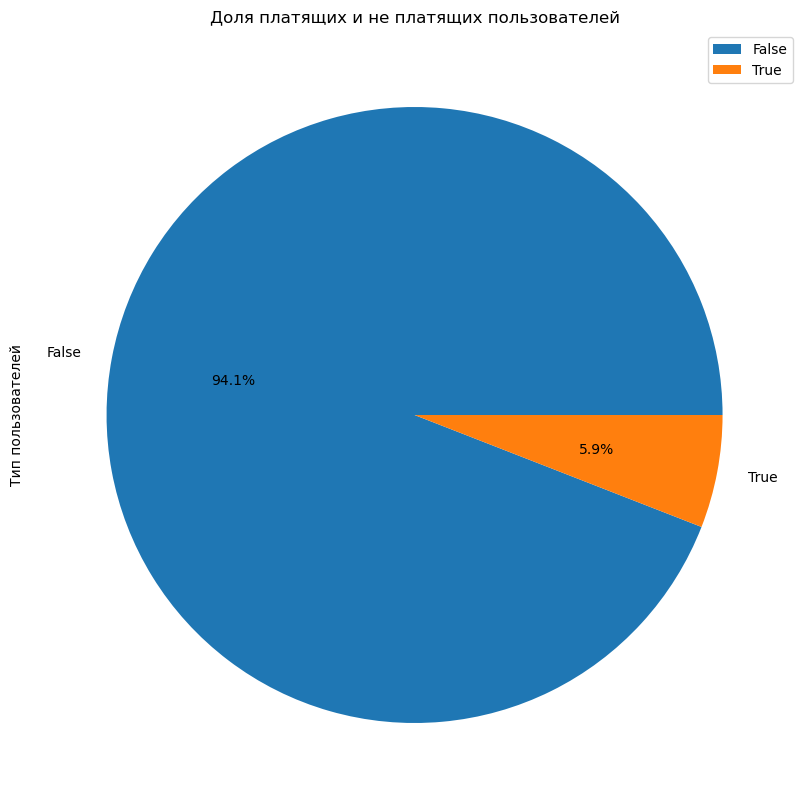

In [21]:
# построим круговую диаграмму по типам пользователей
profiles_payer.sort_values(by='user_id', ascending=False).plot(
    kind='pie', y='user_id', figsize=(10, 10), autopct='%1.1f%%')

# Add labels
plt.title('Доля платящих и не платящих пользователей')
plt.ylabel('Тип пользователей')
plt.show()

Доля платящих пользователей составляет 5,9% от всех пользователей\
Доля не платящих пользователей составляет 94,1% от всех пользователей

In [22]:
# построим таблицу, отражающую количество пользователей и долю платящих из каждой страны

numeric_columns = ['user_id',
                   'payer']

profiles_region = (
    profiles.groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'cnt_users'})
    .sort_values(by='payer', ascending=False)
)
(profiles_region
 .style
 .background_gradient(cmap='Blues', axis=0)
)

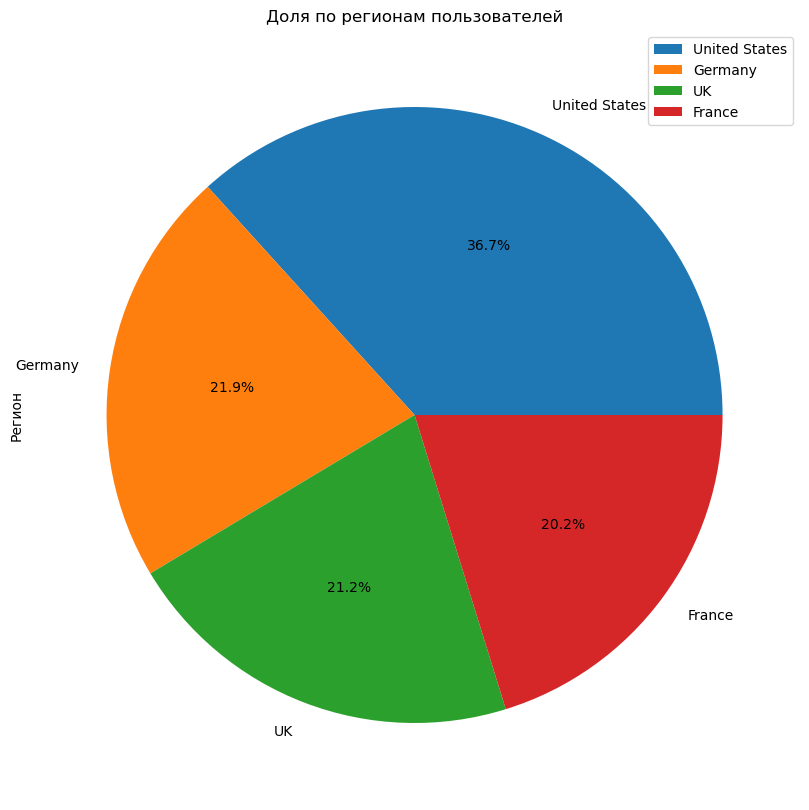

In [23]:
# построим круговую диаграмму по регионам пользователей
profiles_region.sort_values(by='payer', ascending=False).plot(
    kind='pie', y='payer', figsize=(10, 10), autopct='%1.1f%%')

# Add labels
plt.title('Доля по регионам пользователей')
plt.ylabel('Регион')
plt.show()

Доля платящих пользователей по странам:
- В США составляет 6,9% от всех пользователей
- В Германии составляет 4,1% от всех пользователей
- В Великобритании составляет 4% от всех пользователей
- Во Франции составляет 3,8% от всех пользователей

США лидирует по количеству общих пользователей - 100 тыс. человек с огромной долей 66,7%, а Германия  находится на последнем месте - 15 тыс. человек, доля составляет - 10%.

#### Таблица с количеством пользователей и долей платящих для каждого устройства

In [24]:
# построим таблицу, отражающую количество пользователей и долю платящих 
# для каждого устройства

profiles_device = (
    profiles.groupby('device')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'cnt_users'})
    .sort_values(by='payer', ascending=False)
)

(profiles_device
 .style
 .background_gradient(cmap='Blues', axis=0)
)

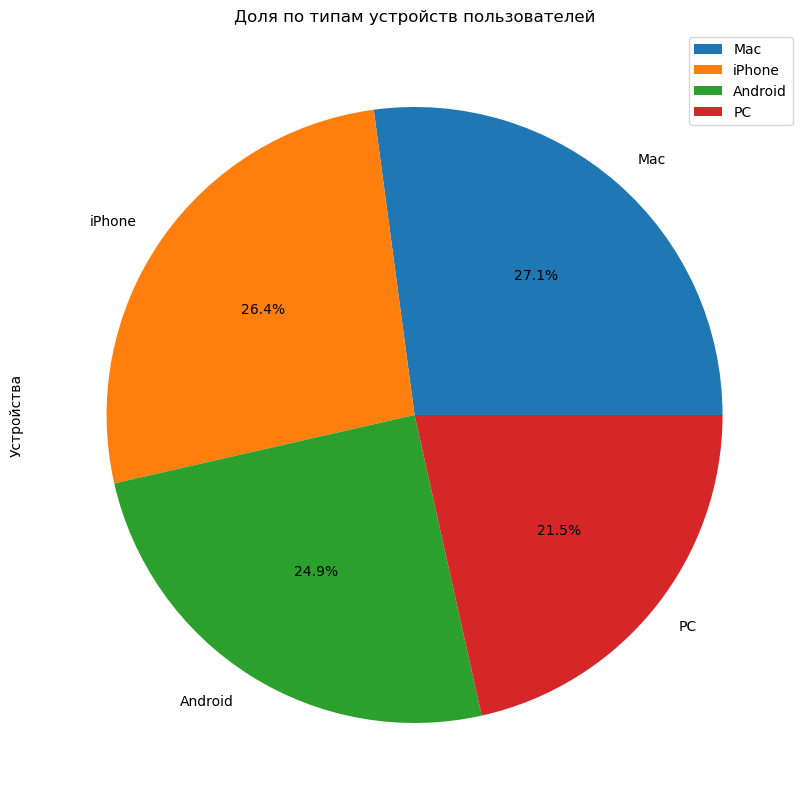

In [25]:
# построим круговую диаграмму по типам устройств пользователей
profiles_device.sort_values(by='payer', ascending=False).plot(
    kind='pie', y='payer', figsize=(10, 10), autopct='%1.1f%%')

# Add labels
plt.title('Доля по типам устройств пользователей')
plt.ylabel('Устройства')
plt.show()

Доля платящих пользователей по устройствам:
- Доля Mac составляет 6,3% от всех пользователей
- Доля iPhone составляет 6,2% от всех пользователей
- Доля Android составляет 5,8% от всех пользователей
- Доля PC составляет 5% от всех пользователей

iPhone лидирует по количеству пользователей - 54 тыс. пользователей с общей долей - 36,3% почти в два раза больше чем у пользователей Mac.\
Хотя Mac и лидирует по доле платящих пользователей, общая доля пользователей меньше всех - 20%.

#### Таблица с количеством пользователей и долей платящих для каждого канала привлечения

In [26]:
# построим таблицу, отражающую количество пользователей и долю платящих 
# для каждого канала привлечения

profiles_channel = (
    profiles.groupby('channel')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .rename(columns={'user_id': 'cnt_users'})
    .sort_values(by='payer', ascending=False)
)

(profiles_channel
 .style
 .background_gradient(cmap='Blues', axis=0)
)

Канал FaceBoom лидирует по доле платящих пользователей (доля составляет 12,2%), также FaceBoom находится на 2м месте по общей доле пользователей (среди платящих и не платящих) - общая доля составляет 19,4% .\
Канал organic находится на последнем месте (доля составляет всего 2%), хотя общая доля пользователей (среди платящих и не платящих) больше всех - 37,6%, если учитывать тот факт, что эти пользователи сами нашли приложение Procrastinate Pro+ и компания не потратила денег на их привлечение, то можно сказать, что это неплохие показатели для данного канала.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг

In [27]:
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

In [28]:
# находим общую сумму расходов на маркетинг

all_costs = (
        costs
        .agg({'costs': 'sum'})
)
all_costs

costs   105497.30
dtype: float64

Общая сумма расходов на маркетинг по всем каналам составляет 105,5 тыс. у.е.

#### Расходы на каждый рекламный источник

In [29]:
# находим расходы на каждый рекламный источник

costs_channel = (
        costs.groupby('channel')
        .agg({'costs': 'sum'})
        .sort_values(by='costs', ascending=False)
)
costs_channel

costs
channel                    
TipTop             54751.30
FaceBoom           32445.60
WahooNetBanner      5151.00
AdNonSense          3911.25
OppleCreativeMedia  2151.25
RocketSuperAds      1833.00
LeapBob             1797.60
lambdaMediaAds      1557.60
MediaTornado         954.48
YRabbit              944.22

Оставим только 2 источника, все остальные поменяем на Others.

In [30]:
costs_top_3 = costs
costs_top_3['channel'] = costs_top_3['channel'].str.replace('WahooNetBanner', 'Others')
costs_top_3['channel'] = costs_top_3['channel'].str.replace('AdNonSense', 'Others')
costs_top_3['channel'] = costs_top_3['channel'].str.replace('OppleCreativeMedia', 'Others')
costs_top_3['channel'] = costs_top_3['channel'].str.replace('RocketSuperAds', 'Others')
costs_top_3['channel'] = costs_top_3['channel'].str.replace('LeapBob', 'Others')
costs_top_3['channel'] = costs_top_3['channel'].str.replace('lambdaMediaAds', 'Others')
costs_top_3['channel'] = costs_top_3['channel'].str.replace('MediaTornado', 'Others')
costs_top_3['channel'] = costs_top_3['channel'].str.replace('YRabbit', 'Others')

In [31]:
# находим расходы на топ-3 рекламных источника

costs_top_3_channel = (
        costs_top_3.groupby('channel')
        .agg({'costs': 'sum'})
        .sort_values(by='costs', ascending=False)
)
costs_top_3_channel

costs
channel          
TipTop   54751.30
FaceBoom 32445.60
Others   18300.40

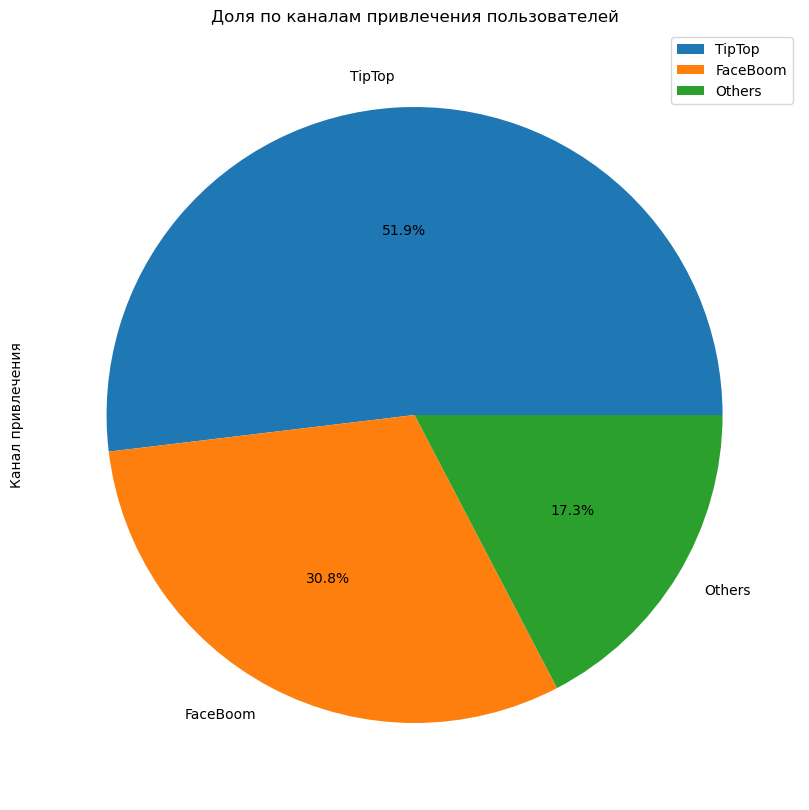

In [32]:
# построим круговую диаграмму по типам пользователей
(costs_top_3_channel
 .sort_values(by='costs', ascending=False)
 .plot(kind='pie', y='costs', figsize=(10, 10), autopct='%1.1f%%')
)

# Add labels
plt.title('Доля по каналам привлечения пользователей')
plt.ylabel('Канал привлечения')
plt.show()

На канал TipTop потратили больше всего денег 54,7 тыс. или 51,9% от всего бюджета.\
Далее на втором месте находится канал FaceBoom, на него было привлечено  32,4 тыс. или 30,8% от всего бюджета.\
На все оставшиеся каналы было привлечено менее 20% от всего бюджета.

#### График с визуализацией динамики изменения расходов 

In [33]:
# создадим отдельные колонки с номером недели и месяца

costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

costs['month'] = pd.to_datetime(costs['dt']).dt.month

costs.head()

dt   channel  costs  week  month
0  2019-05-01  FaceBoom 113.30    18      5
1  2019-05-02  FaceBoom  78.10    18      5
2  2019-05-03  FaceBoom  85.80    18      5
3  2019-05-04  FaceBoom 136.40    18      5
4  2019-05-05  FaceBoom 122.10    18      5

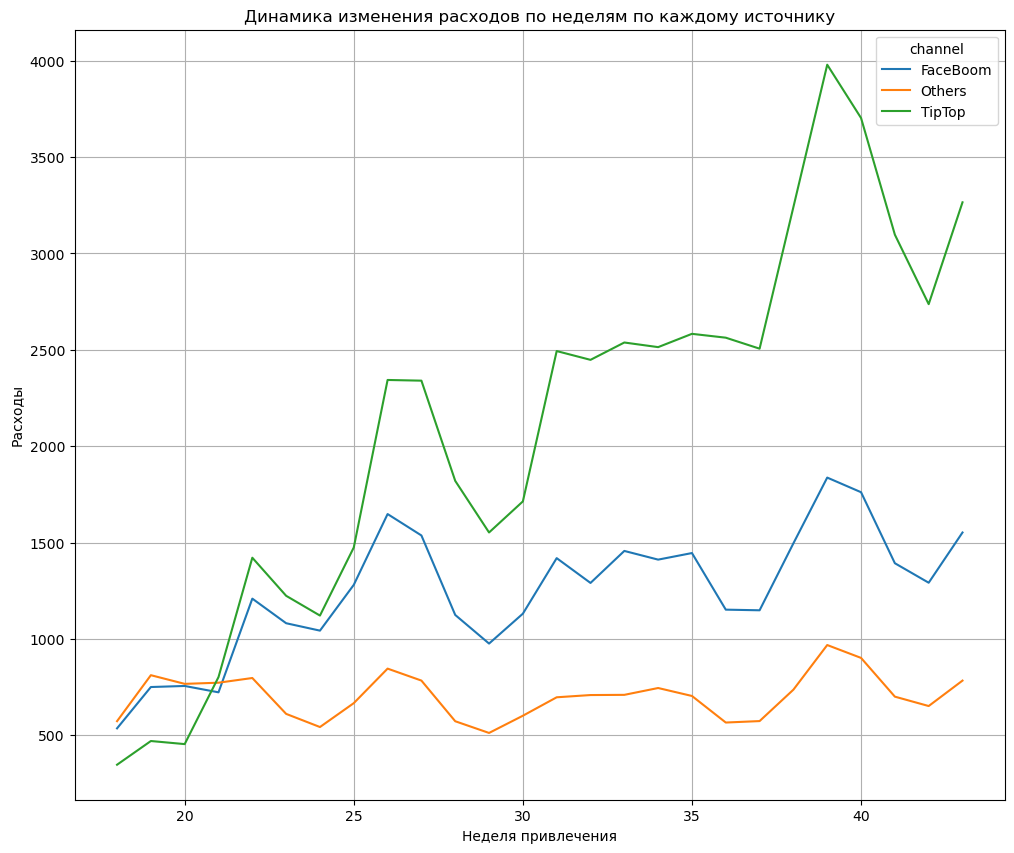

In [34]:
# построим сводную таблицу по неделям

filter_week = costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
)

# построим график 

filter_week.plot(grid=True, figsize=(12, 10))

# add labels
plt.xlabel('Неделя привлечения')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов по неделям по каждому источнику')

plt.show()

Построим график с ограничением по вертикальной оси для удобства визуализации источников с малыми расходами.

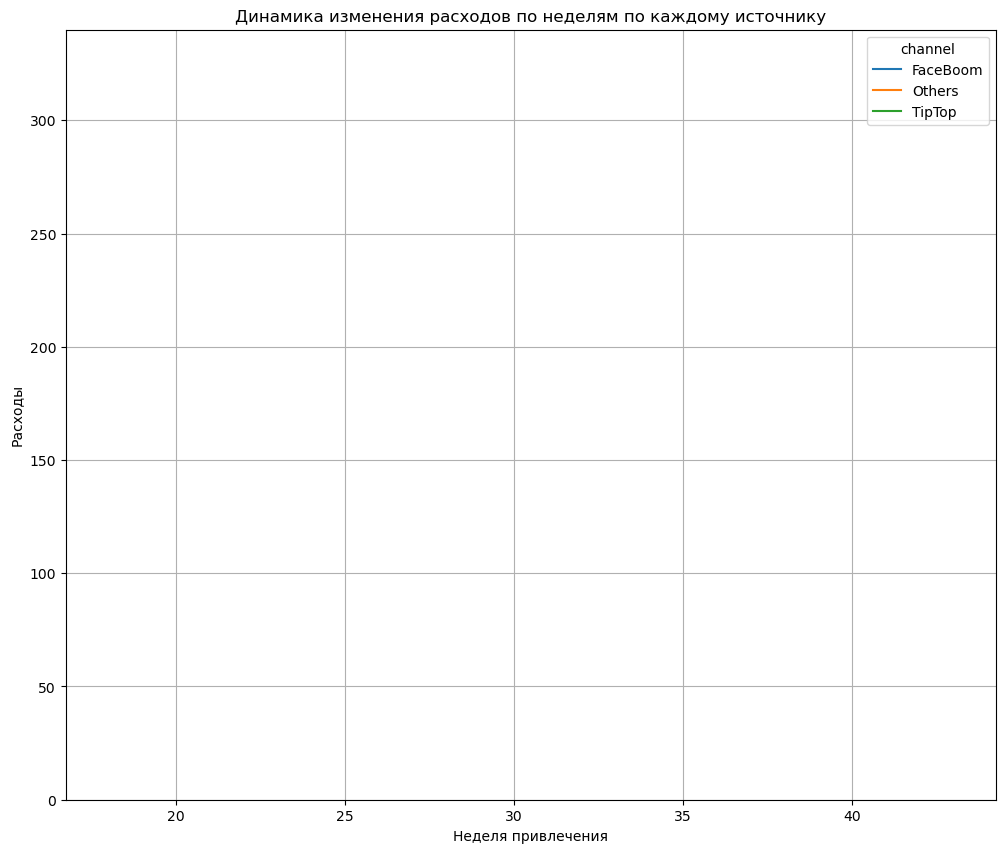

In [35]:
# построим сводную таблицу по неделям

filter_week = costs.pivot_table(
        index='week', columns='channel', values='costs', aggfunc='sum'
)

# построим график с ограничением по вертикальной оси

filter_week.plot(grid=True, figsize=(12, 10), ylim=(0, 340))

# add labels
plt.xlabel('Неделя привлечения')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов по неделям по каждому источнику')

plt.show()

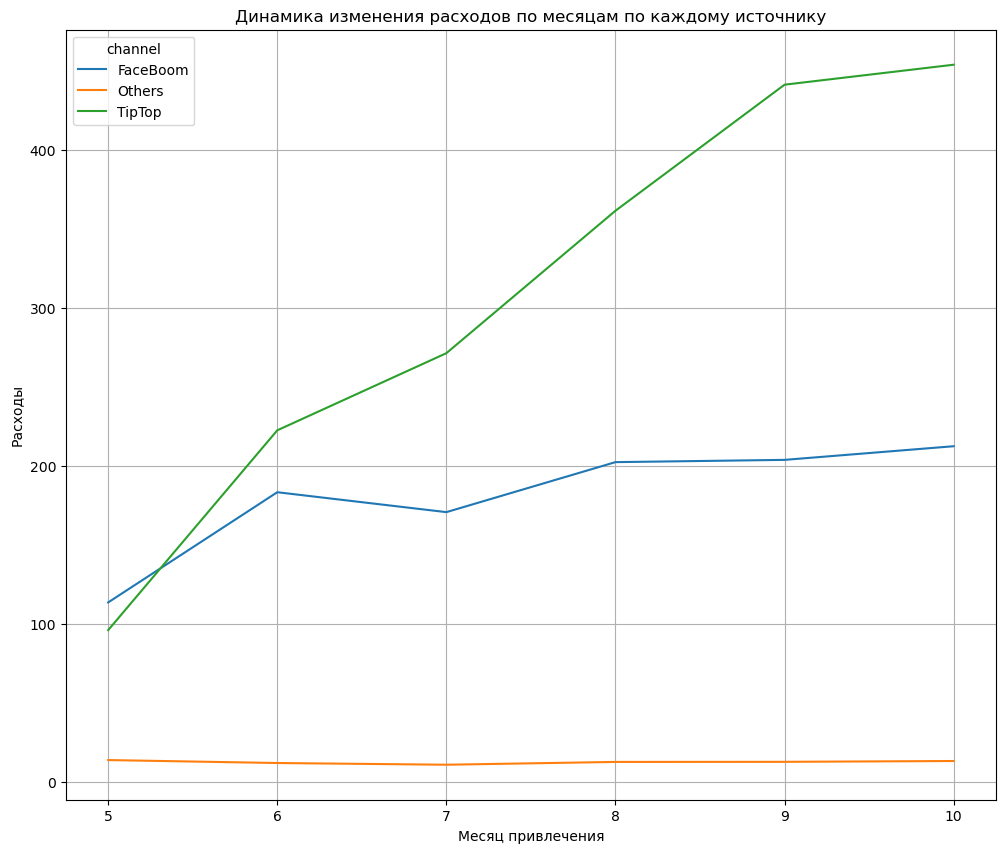

In [36]:
# построим сводную таблицу по месяцам
filter_dat = costs.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='mean'
)

# построим график 
filter_dat.plot(grid=True, figsize=(12, 10))

# add labels
plt.xlabel('Месяц привлечения')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов по месяцам по каждому источнику')

plt.show()

Построим график с ограничением по вертикальной оси для удобства визуализации источников с малыми расходами.

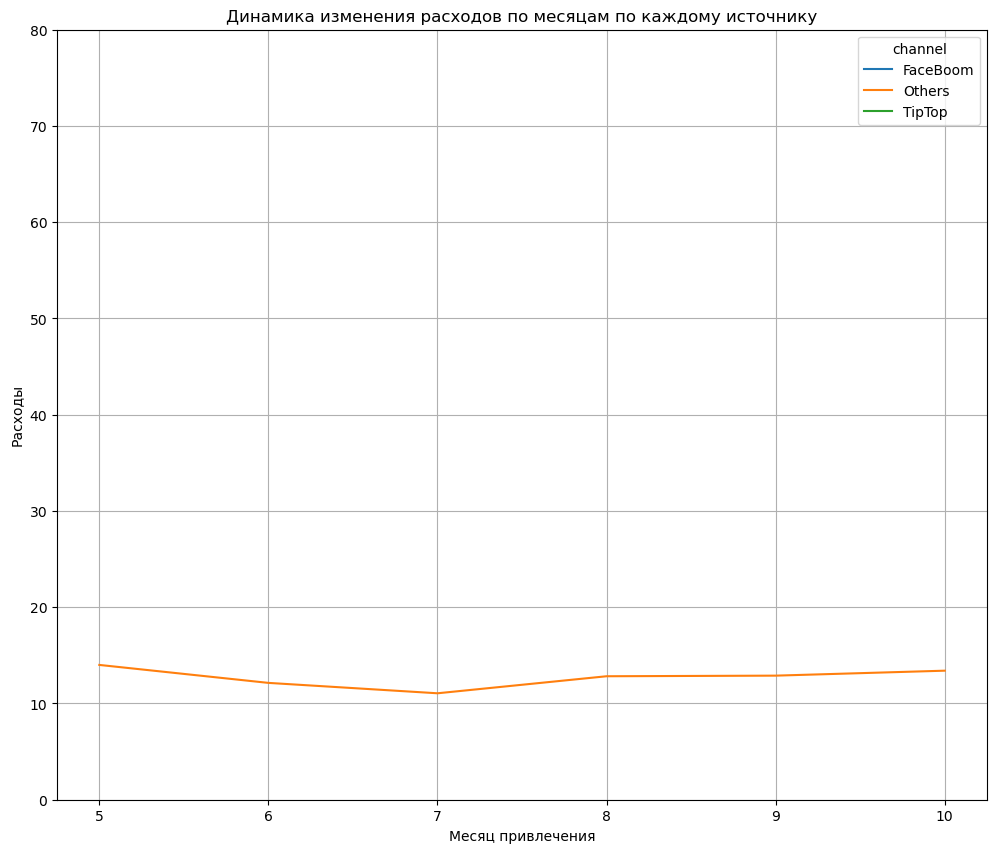

In [37]:
# построим сводную таблицу по месяцам
filter_dat = costs.pivot_table(
        index='month', columns='channel', values='costs', aggfunc='mean'
)

# построим график с ограничением пол вертикальной оси
filter_dat.plot(grid=True, figsize=(12, 10), ylim=(0, 80))

# add labels
plt.xlabel('Месяц привлечения')
plt.ylabel('Расходы')
plt.title('Динамика изменения расходов по месяцам по каждому источнику')

plt.show()

Взглянув на графики динамики изменения расходов по неделям и месяцам видно, что расходы на каналы TipTop и FaceBoom значительно увеличиваются по сравнению с остальными каналами.

#### Средняя стоимость привлечения одного пользователя (САС)

In [38]:
# находим среднюю стоимость привлечения одного пользователя (CAC) 
# из каждого источника

cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values(by='cac', ascending=False)
)

cac

cac
channel                
TipTop             2.80
FaceBoom           1.11
AdNonSense         1.01
lambdaMediaAds     0.72
WahooNetBanner     0.60
RocketSuperAds     0.41
OppleCreativeMedia 0.25
YRabbit            0.22
MediaTornado       0.22
LeapBob            0.21
organic            0.00

Средняя стоимость привлечения одного пользователя из канала TipTop обошлась компании в 2,8 у.е., из FaceBoom - 1,11 у.е., AdNonSense - 1 у.е.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Анализ окупаемости рекламы с помощью графиков

Стоит исключить органический трафик,так как мы не платим за этих пользователей, а доход от них может завышать  показатели и скрыть от нас проблемы в какой-то стране или же типе устройств.

In [39]:
# исключаем органический трафик
profiles = profiles.query('channel != "organic"')
profiles

user_id            first_ts       channel   device  \
0             599326 2019-05-07 20:58:57      FaceBoom      Mac   
1            4919697 2019-07-09 12:46:07      FaceBoom   iPhone   
3           22593348 2019-08-22 21:35:48    AdNonSense       PC   
4           31989216 2019-10-02 00:07:44       YRabbit   iPhone   
7           46006712 2019-06-30 03:46:29    AdNonSense  Android   
...              ...                 ...           ...      ...   
149999  999942424543 2019-05-24 21:03:26        TipTop   iPhone   
150001  999949280903 2019-08-12 06:47:27      FaceBoom      Mac   
150003  999956196527 2019-09-28 08:33:02        TipTop   iPhone   
150005  999976332130 2019-07-23 02:57:06        TipTop   iPhone   
150006  999979924135 2019-09-28 21:28:09  MediaTornado       PC   

               region          dt  month  payer  acquisition_cost  
0       United States  2019-05-07      5   True              1.09  
1       United States  2019-07-09      7  False              1.11  
3             Germany  2019-08-22      8  False              0.99  
4       United States  2019-10-02     10  False              0.23  
7              France  2019-06-30      6   True              1.01  
...               ...         ...    ...    ...               ...  
149999  United States  2019-05-24      5  False              1.90  
150001  United States  2019-08-12      8  False              1.12  
150003  United States  2019-09-28      9  False              3.50  
150005  United States  2019-07-23      7  False              2.60  
150006  United States  2019-09-28      9  False              0.21  

[93569 rows x 9 columns]

In [40]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

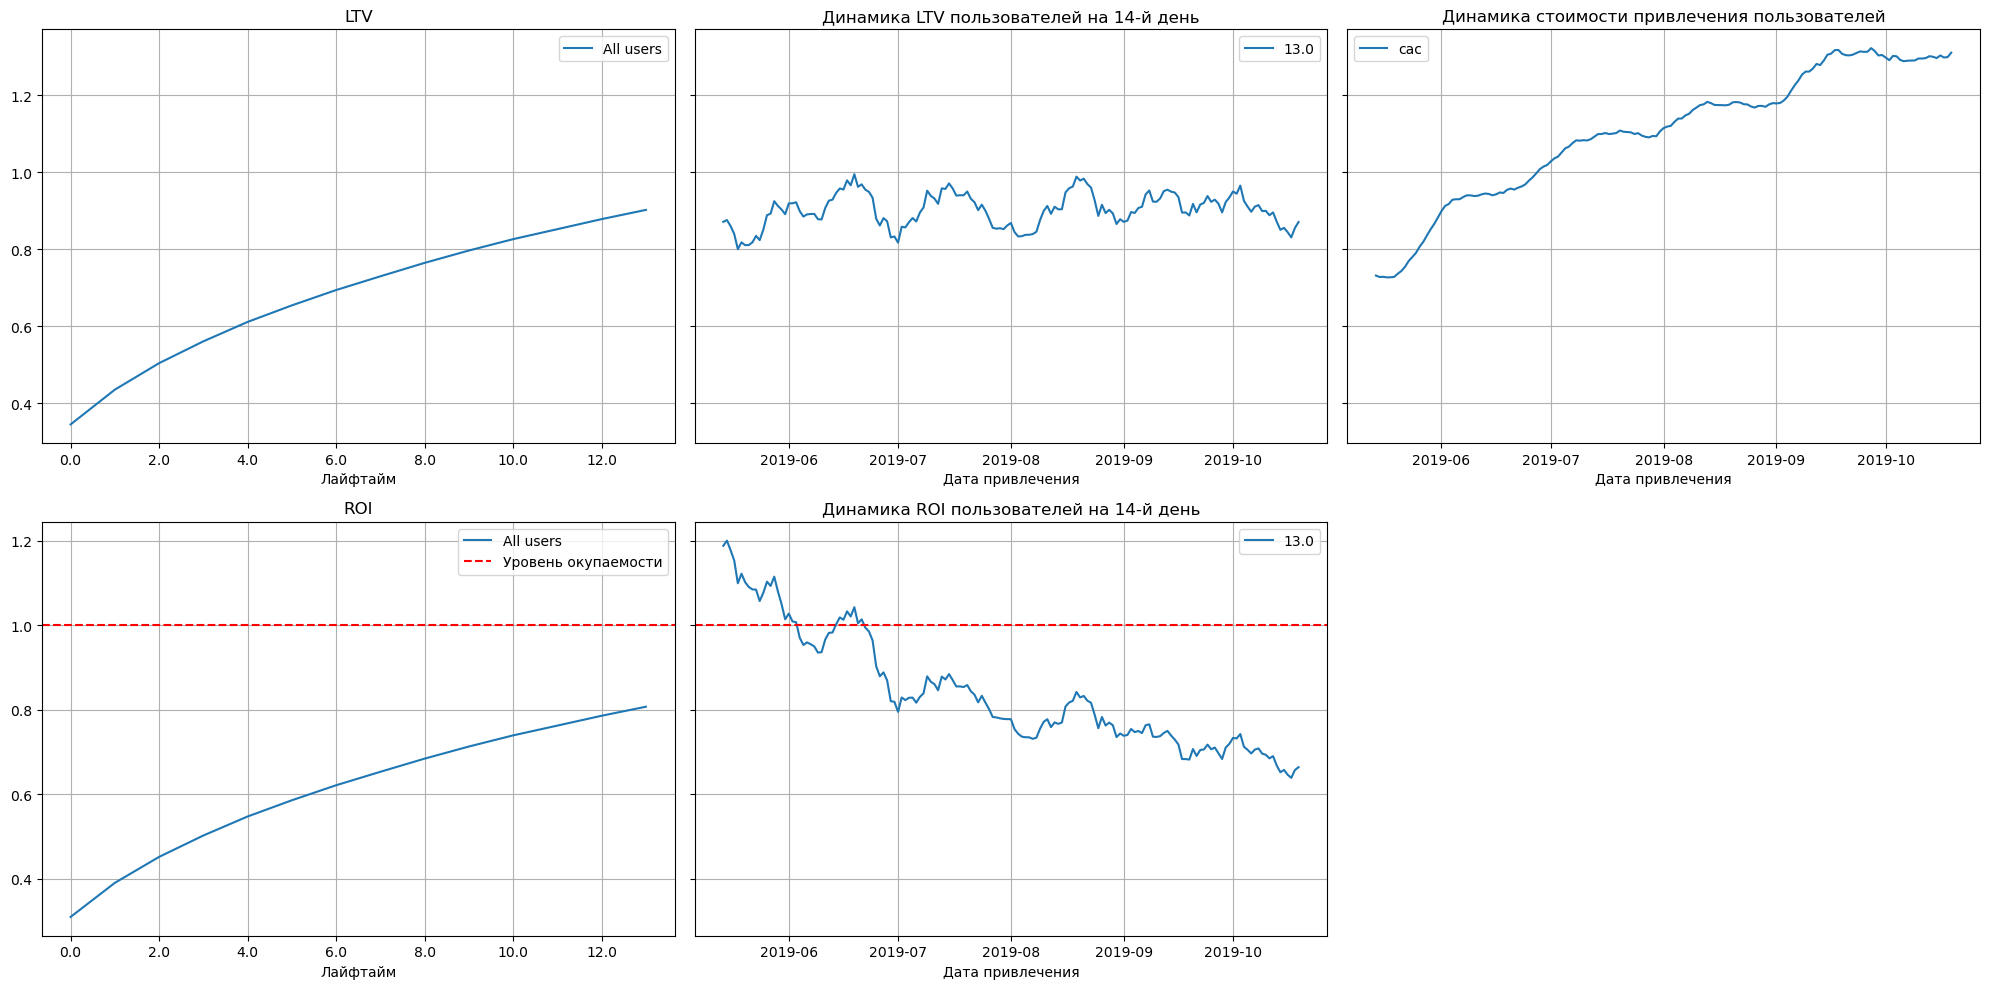

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:
- Реклама не окупается. ROI в конце 2 недели — в районе 80%.
- CAC значительно увеличивается со временем. Компания сильно увеличила расходы на привлечение пользователя.
- Динамика LTV достаточно стабильна. Значит, большие вливания не принесли достаточной пользы в увеличении выручки.

Cтабильность LTV и рост CAC, может говорить о росте конкуренции на канале или увеличением бюджета по каналу.

**Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — 
разложим на частные причины и декомпозируем весь трафик по странам, устройствам, регионам и поищем где конкретно и в какой момент случилась проблема.**

#### Проверка конверсии и удержания

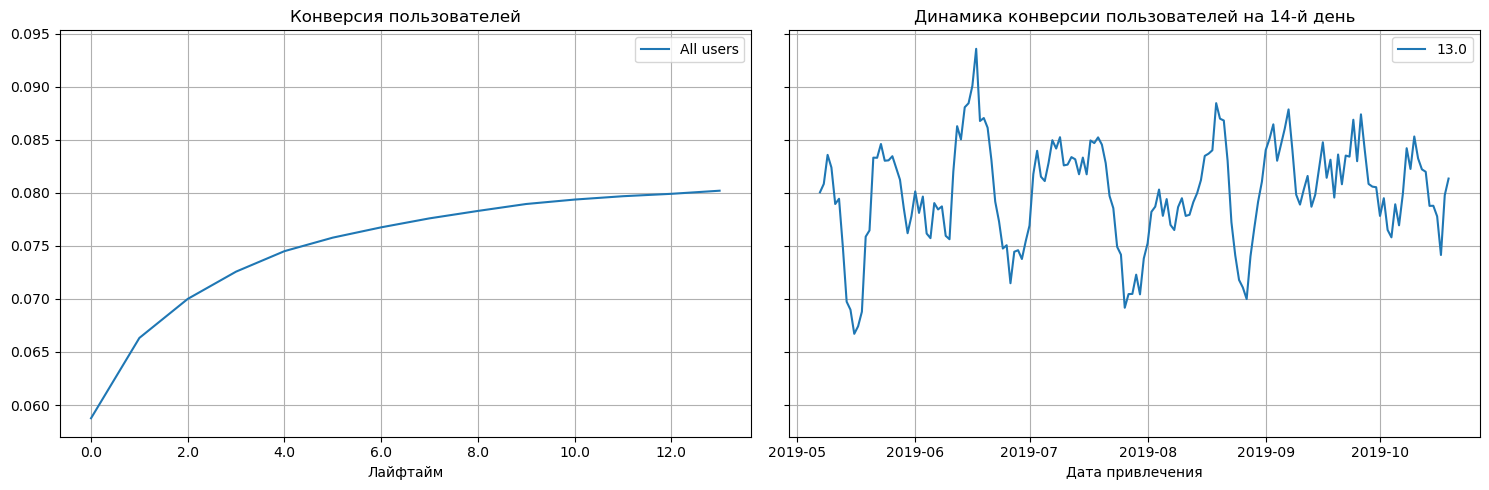

In [42]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи конвертируются хорошо, причём постоянно.

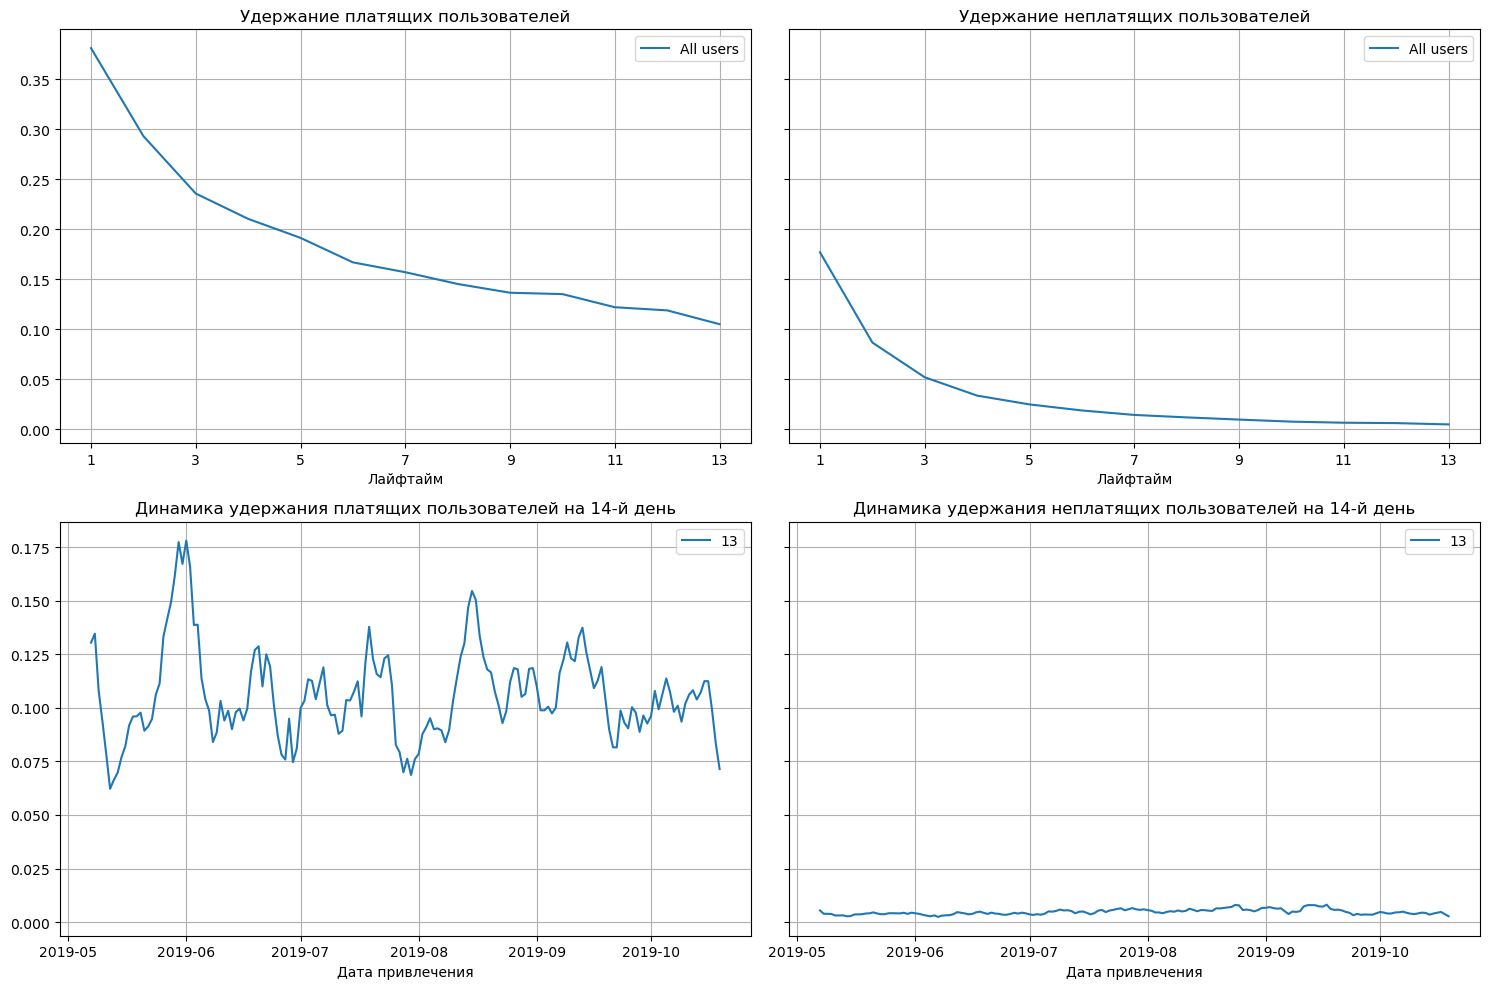

In [43]:
# смотрим удержание с разбивкой на платящих и неплатящих пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей тоже в пределах нормы, кроме удержания неплатящих пользователей - в конце второй недели они близки к нулю.

#### Анализ окупаемости рекламы с разбивкой по странам

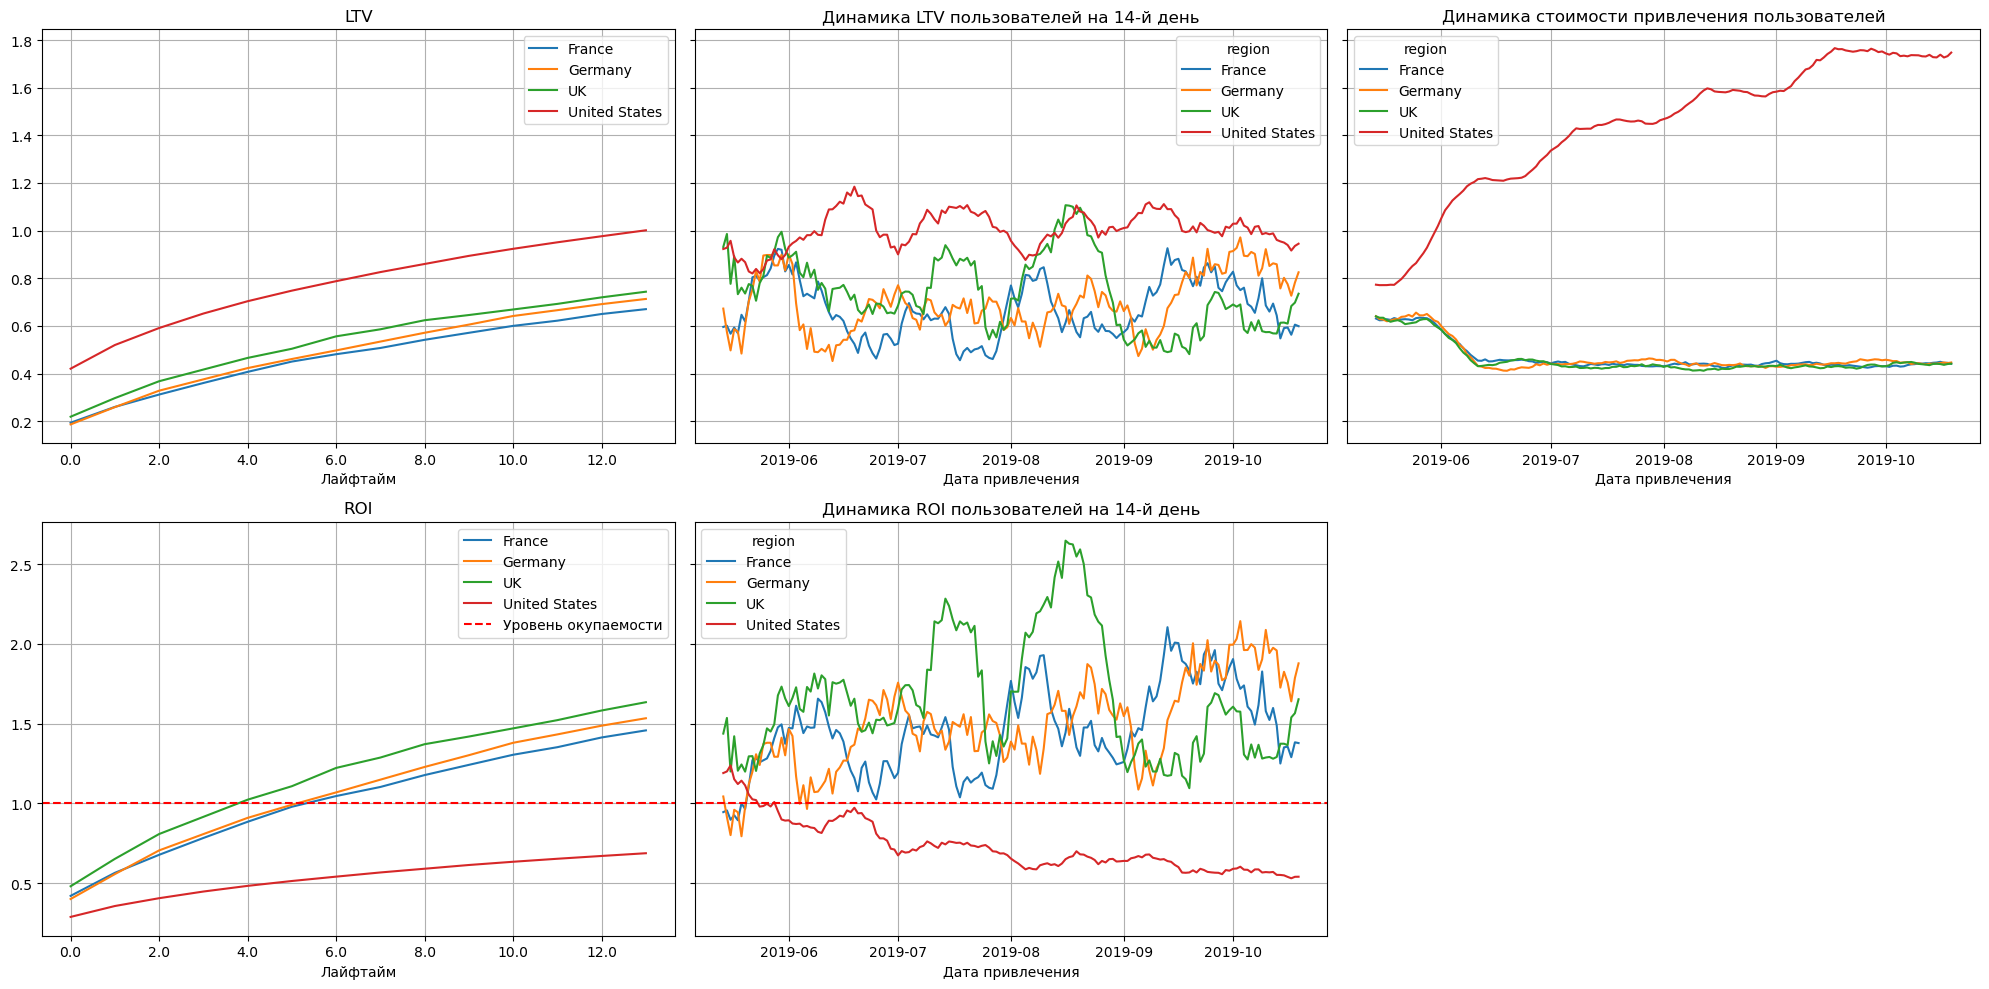

In [44]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

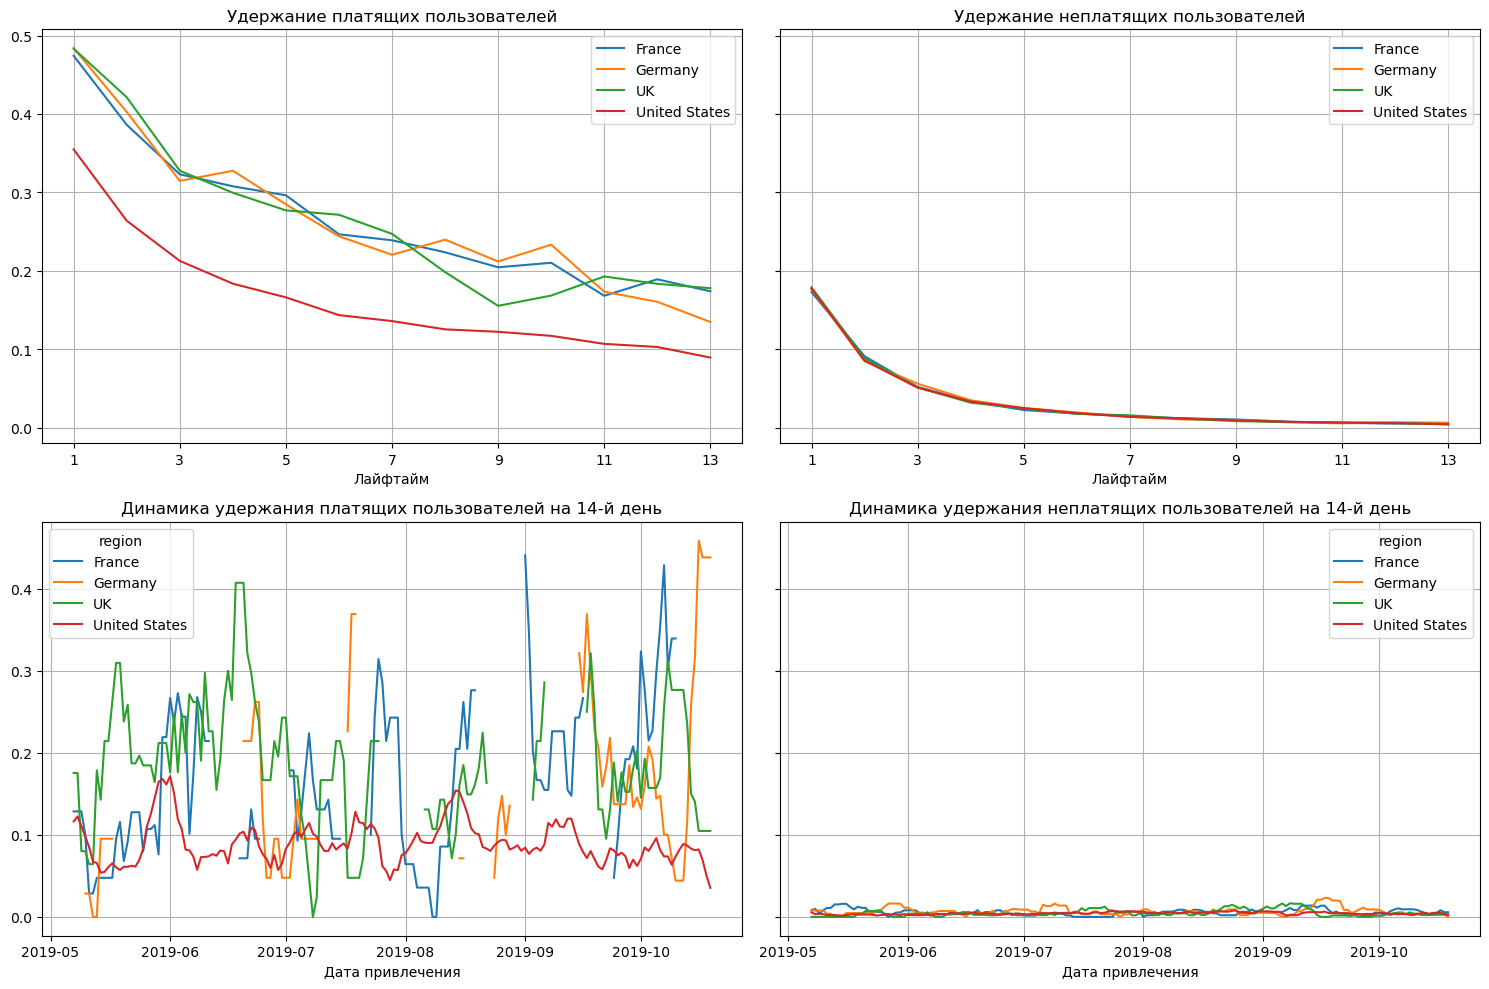

In [45]:
# смотрим удержание с разбивкой на платящих и неплатящих по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

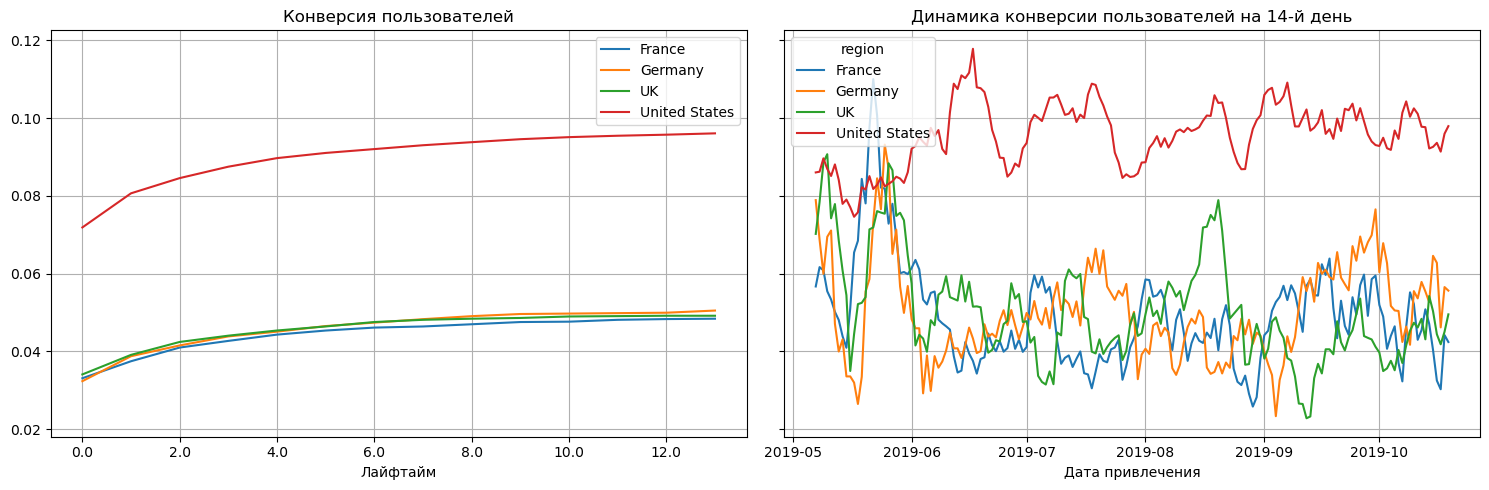

In [46]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама окупается по всем странам кроме США. ROI в конце 2 недели у пользователей из США около 70%, в то время как во всех остальных странах в районе 150 - 170 %.
- CAC у пользователей из США значительно увеличивается со временем. Компания сильно увеличила расходы на привлечение пользователя из США, во всех остальных странах - наоборот, уменьшили.
- LTV достаточно стабилен, выручка у пользователей из США чуть выше, но большие вливания - не окупаются.
- Платящие пользователи из США плохо удерживаются. Удержание 14-го дня ниже, чем у пользователей из остальных стран, 5 б.п.
- Конверсия у пользователей из США наоборот выше, чем у пользователей из остальных стран, примерно на 40%.

**Стоит подробнее рассмотреть на всех ли каналах, которые приводят трафик в США, такая ситуация.**

#### Анализ окупаемости рекламы с разбивкой по устройствам

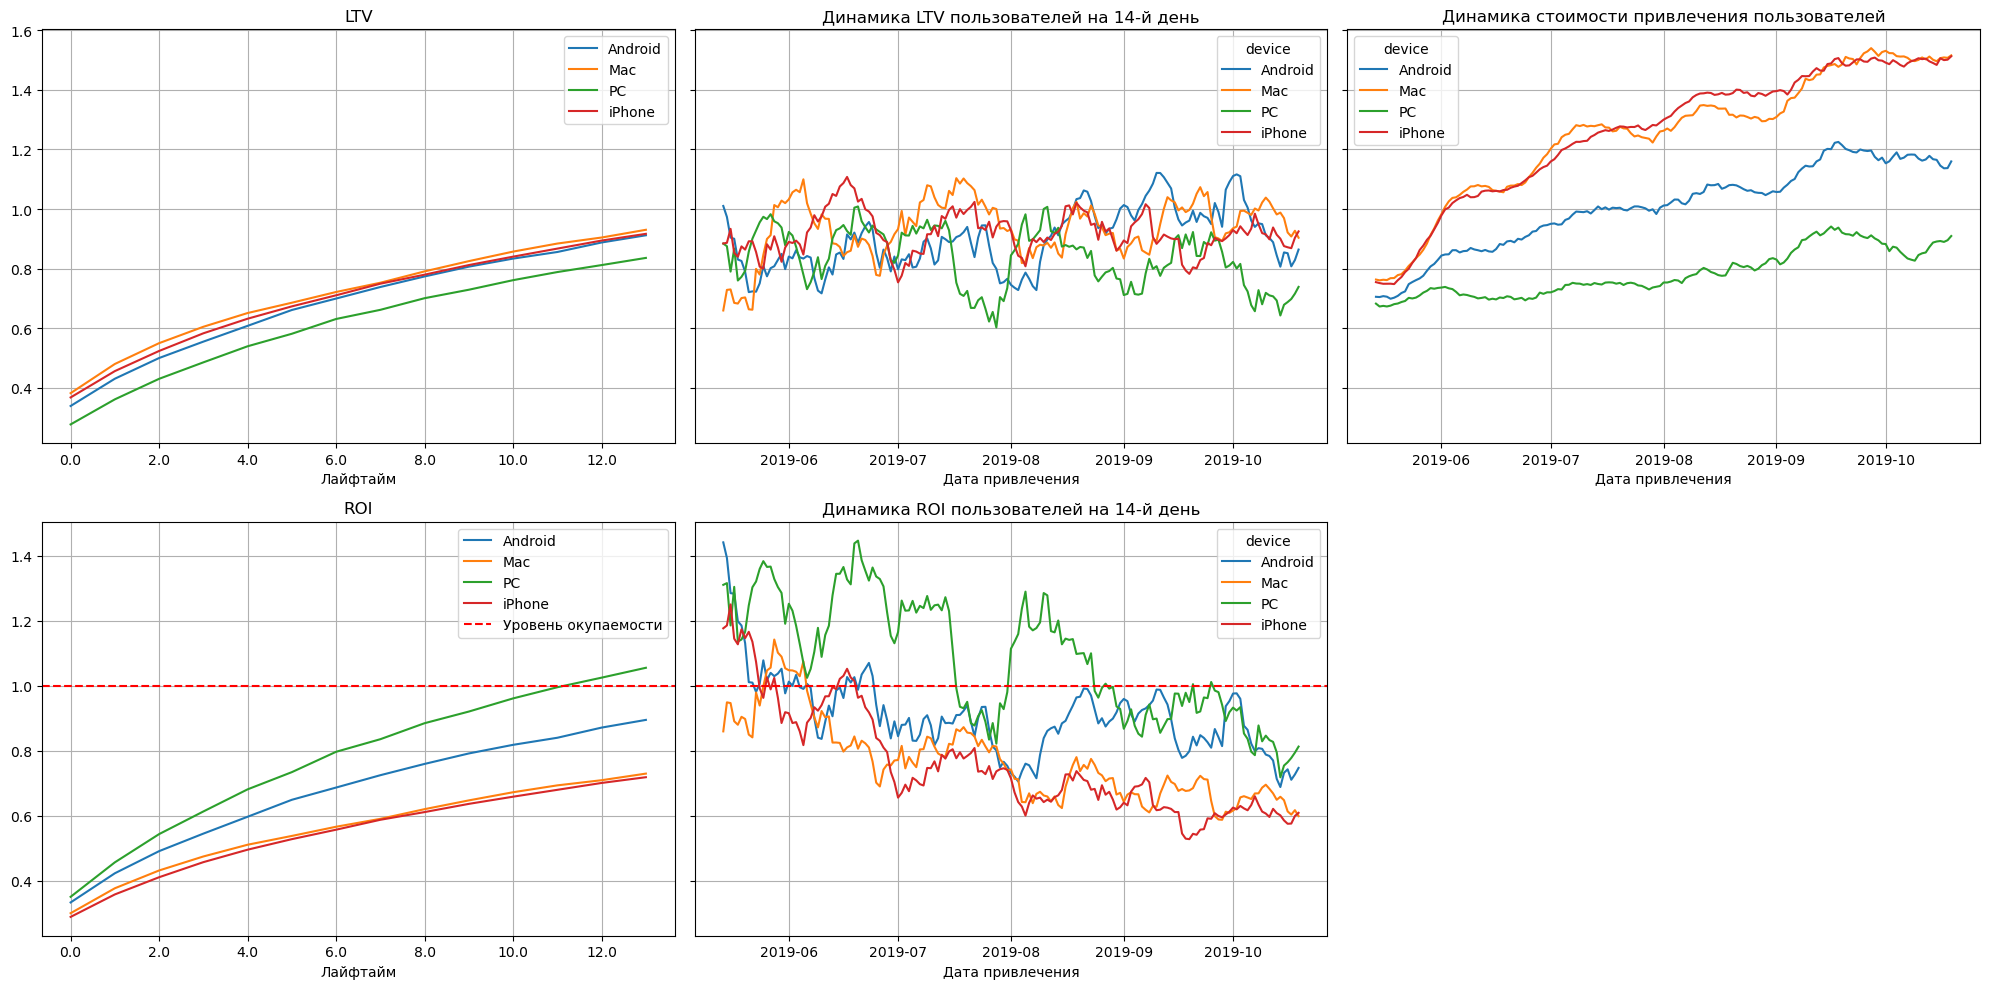

In [47]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

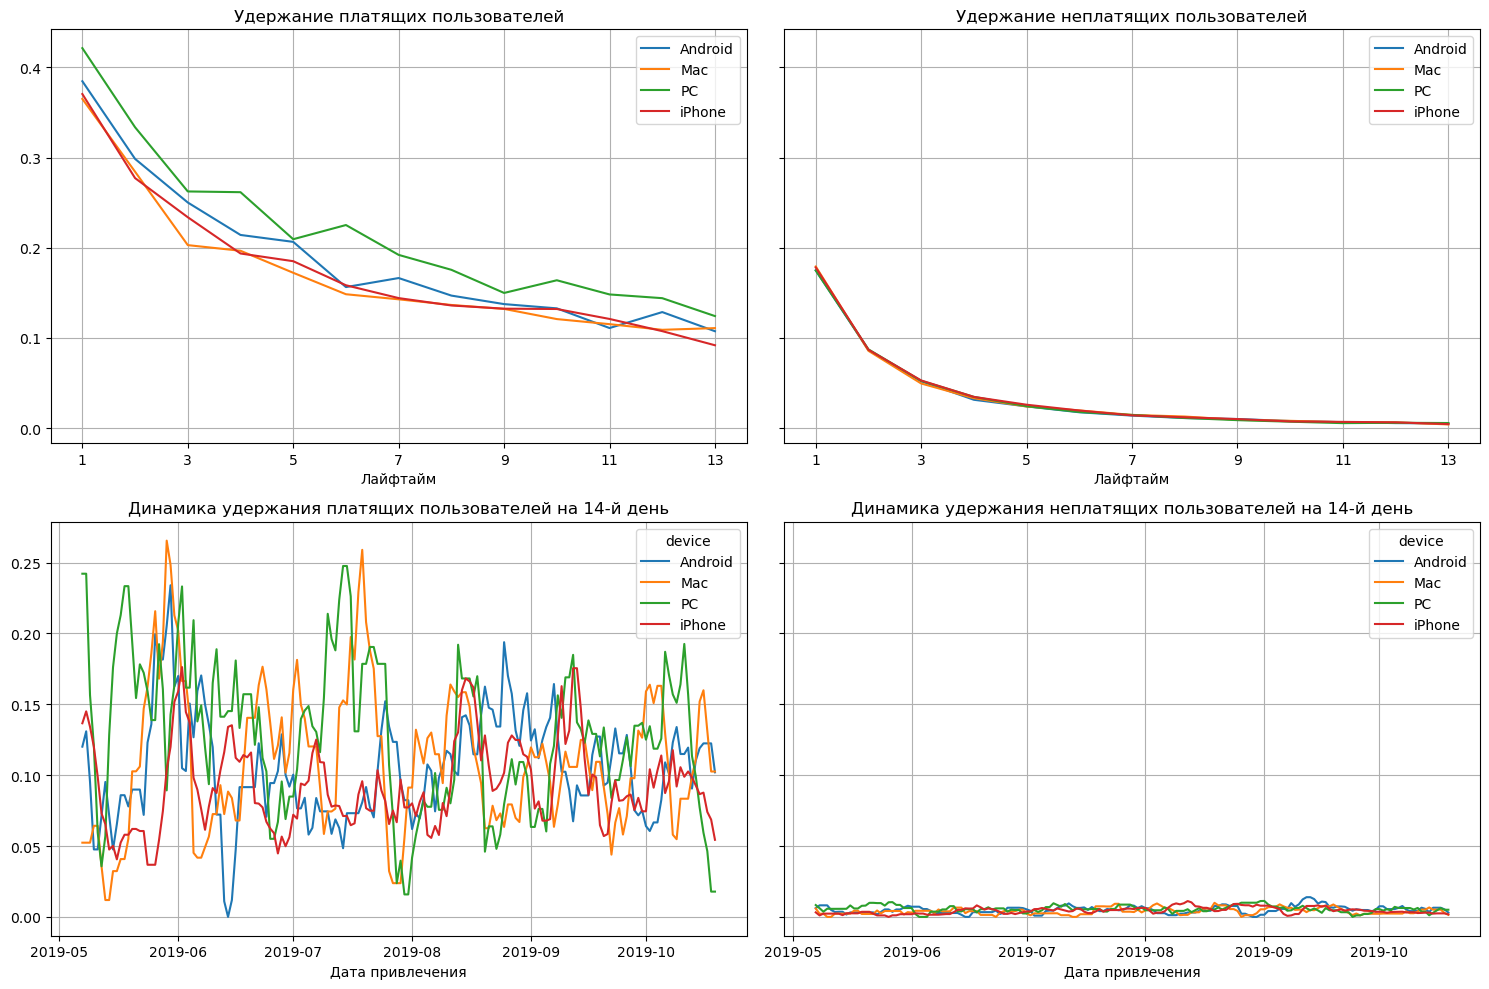

In [48]:
# смотрим удержание с разбивкой на платящих и неплатящих по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

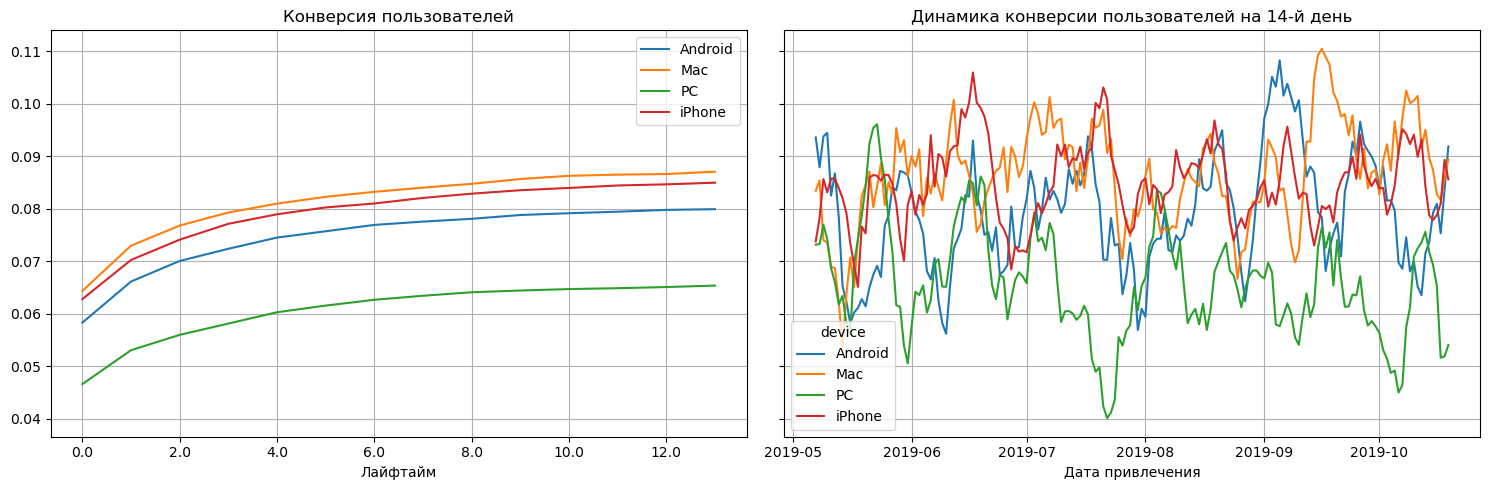

In [49]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама окупается только у пользователей с девайсами PC (ROI - 105%), а у пользователей с девайсами iPhone и Mac в конце второй недели - показатели ROI на уровне 75%, у пользователей PC - 90%.\
По графикам видно, что чем больше расходов на привлечение пользователя - тем ниже окупаемость инвестиций.
- CAC у пользователей с девайсами iPhone и Mac значительно увеличиваются со временем, по сравнению с пользователями девайсов PC и Android. Компания значительно увеличила расходы на привлечение пользователя c устройствами iPhone и Mac, в то время как САС у пользователей РС - стабильна.
- LTV достаточно стабилен, выручка у всех пользователей примерно на одном уровне.
- Пользователи с разных девайсов стабильно хорошо удерживаются. Колебания у устройств PC и Mac менее устойчивы, это скорее всего связано с тем, что их количество сильно ниже чем с мобильных устройств. Также видно, что у неплатящих пользователей динамика намного кажется стабильней, т.к. наблюдений по этим пользователям намного больше, чем по неплатящим.
- У пользователей РС конверсия хуже чем у пользователей с остальных девайсов - на 14-й день примерно на 15%.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам

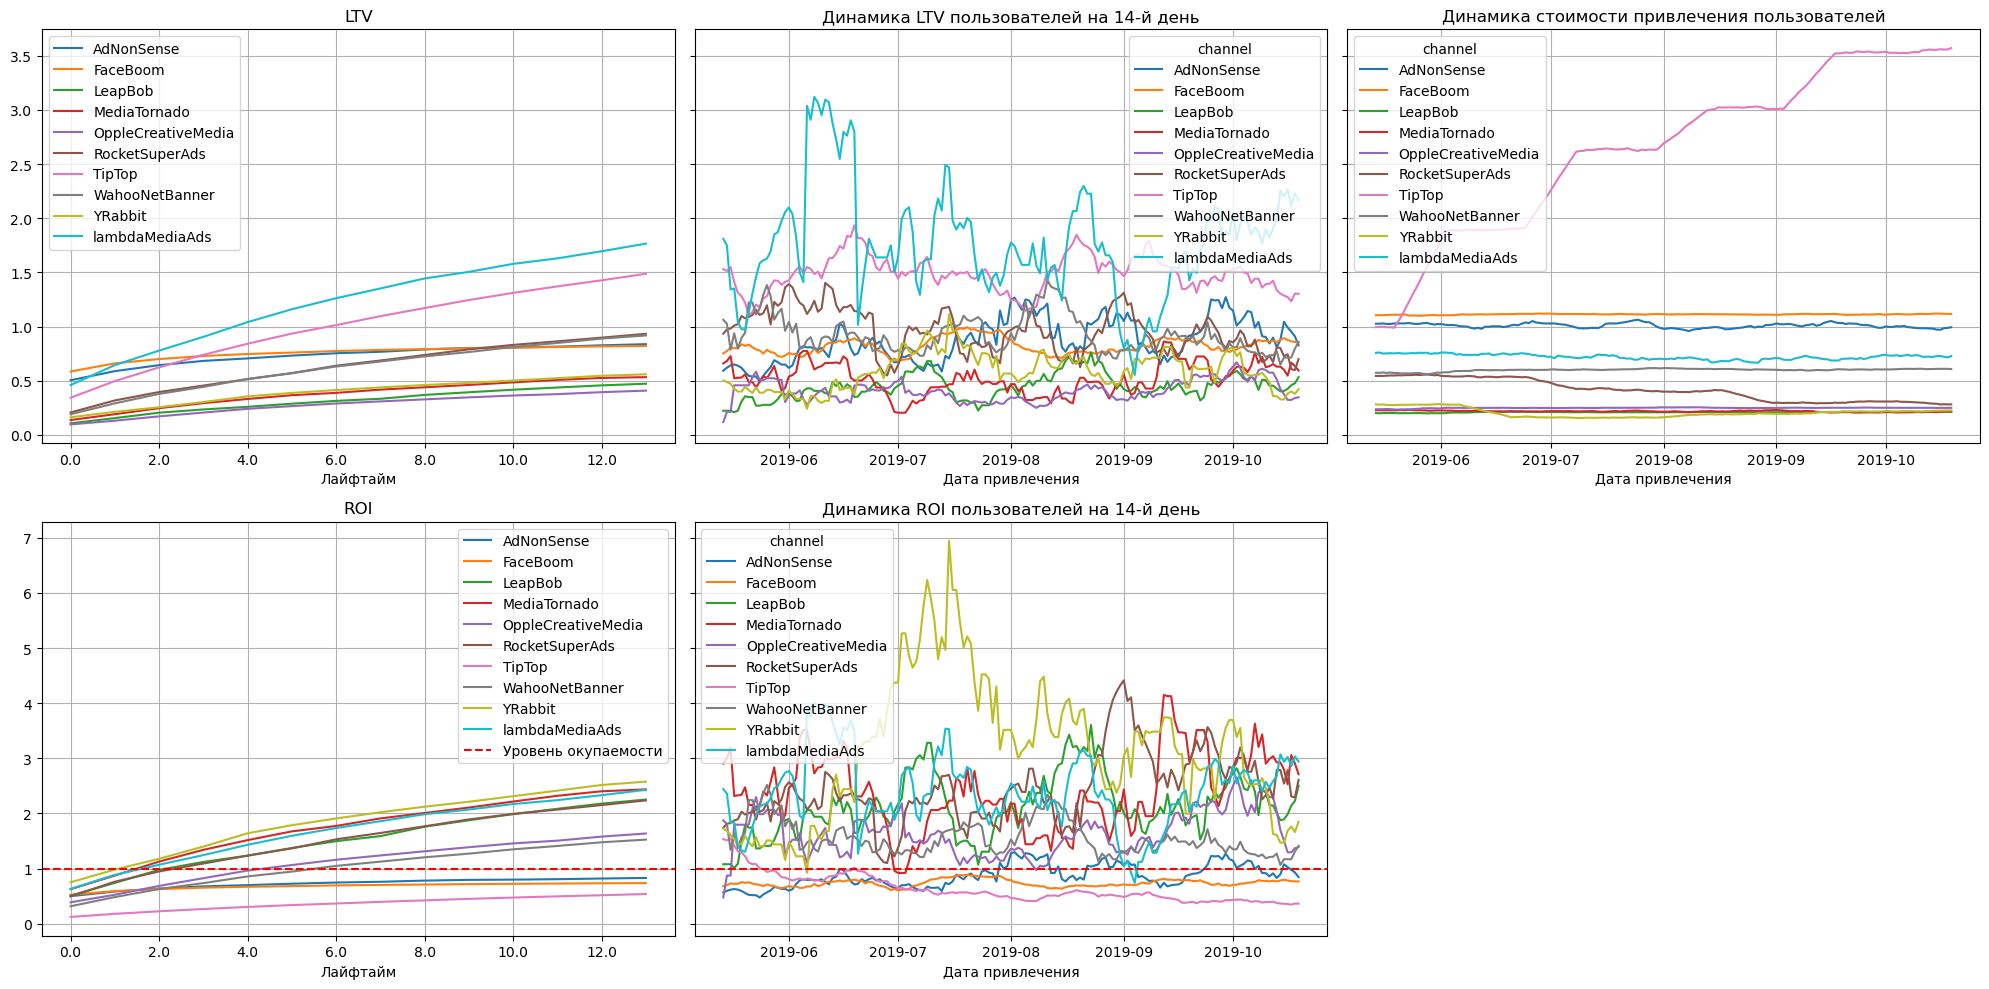

In [50]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

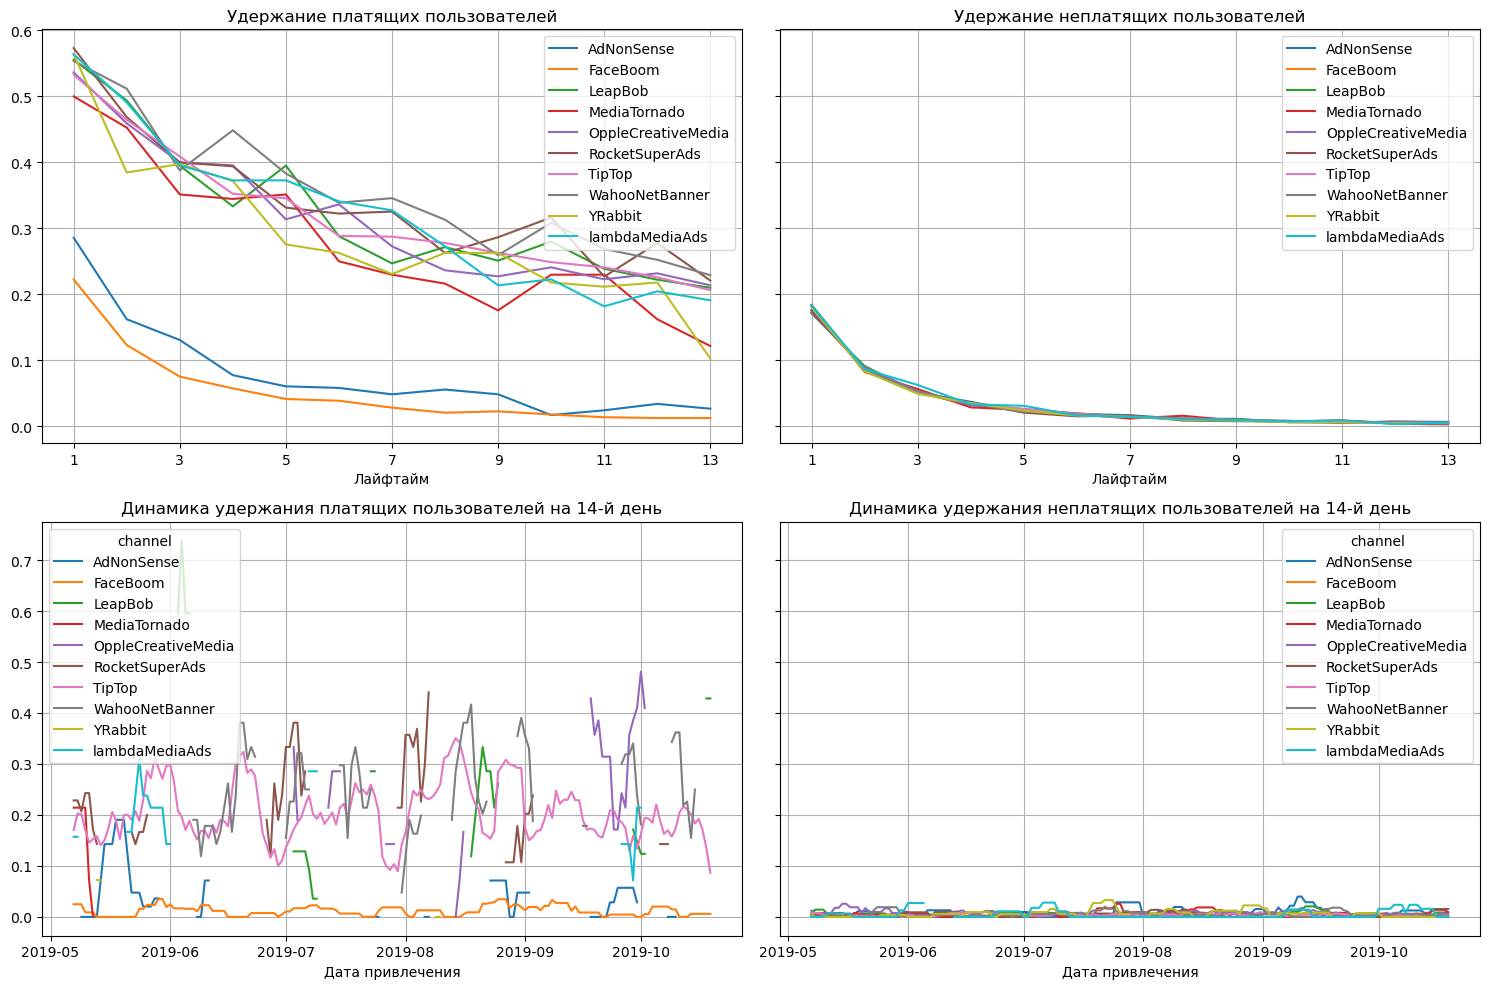

In [51]:
# смотрим удержание с разбивкой на платящих и неплатящих по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

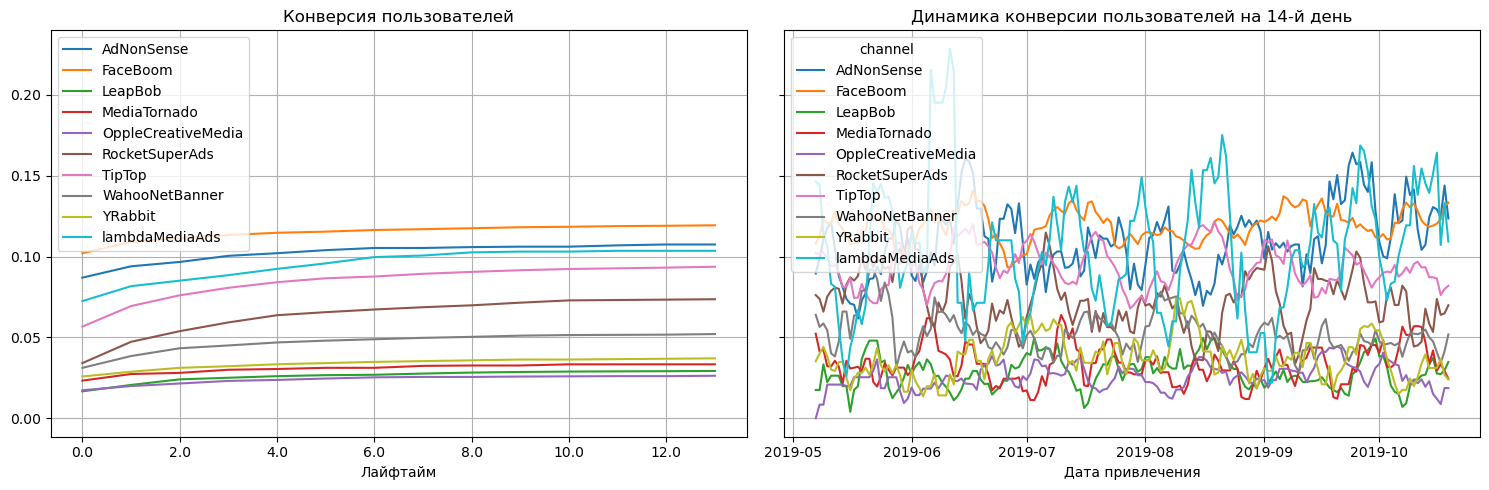

In [52]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама окупается у пользователей привлеченных из следующих каналов: YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds, LeapBob (показатель ROI примерно на уровне 250%); OppleCreativeMedia, WahooNetBanner (показатель ROI примерно на уровне 150%). У следующих каналов реклама не окупается: AdNonSense (ROI - 90%), FaceBoom (ROI - 85%), TipTop (ROI - 60%).
- CAC у пользователей привлеченных из канала TipTop значительно увеличивается со временем, по сравнению со всем остальными каналами. Компания сильно увеличила расходы на привлечение пользователей из этого канала.
- LTV каналов lambdaMediaAds и TipTop заметно выше всех остальных. Большие вливания в рекламу TipTop не помогли превзойти показатели выручки среди всех компаний, а показатели ROI ниже всех. **Возможно тут есть связь между вливаниями в пользователей из США и данными каналами привлечения, стоит рассмотреть данные.**
- Платные пользователи привлеченные с каналов AdNonSense и FaceBoom удерживаются хуже остальных, также данный момент по удержанию был анологичен пользователям из США.
- Конверсия пользователей с каналов стабильная, но довольно разношерстная. Лучшие показатели выше 10% у пользователей привлеченных из следующих каналов: FaceBoom, AdNonSense, lambdaMediaAds.\
Худшие показатели ниже 5% у пользователей привлеченных из следующих каналов: YRabbit, MediaTornado, LeapBob, OppleCreativeMedia.

#### Анализ окупаемости рекламы из США

Разберём отдельно страну США, т.к. именно по ним были самые большие вливания в рекламу и худшие показатели по удержанию.

In [53]:
# Возмём разрез датасета только по стране США
profiles_usa = profiles[profiles['region'] == 'United States']
profiles_usa

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
8           58263264 2019-05-11 19:18:43      FaceBoom  iPhone  United States   
9           59835779 2019-05-11 21:13:47  MediaTornado  iPhone  United States   
...              ...                 ...           ...     ...            ...   
149999  999942424543 2019-05-24 21:03:26        TipTop  iPhone  United States   
150001  999949280903 2019-08-12 06:47:27      FaceBoom     Mac  United States   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   

                dt  month  payer  acquisition_cost  
0       2019-05-07      5   True              1.09  
1       2019-07-09      7  False              1.11  
4       2019-10-02     10  False              0.23  
8       2019-05-11      5  False              1.13  
9       2019-05-11      5  False              0.25  
...            ...    ...    ...               ...  
149999  2019-05-24      5  False              1.90  
150001  2019-08-12      8  False              1.12  
150003  2019-09-28      9  False              3.50  
150005  2019-07-23      7  False              2.60  
150006  2019-09-28      9  False              0.21  

[61829 rows x 9 columns]

Построим графики для анализа окупаемости рекламы с разбивкой по утройствам и рекламным каналам.

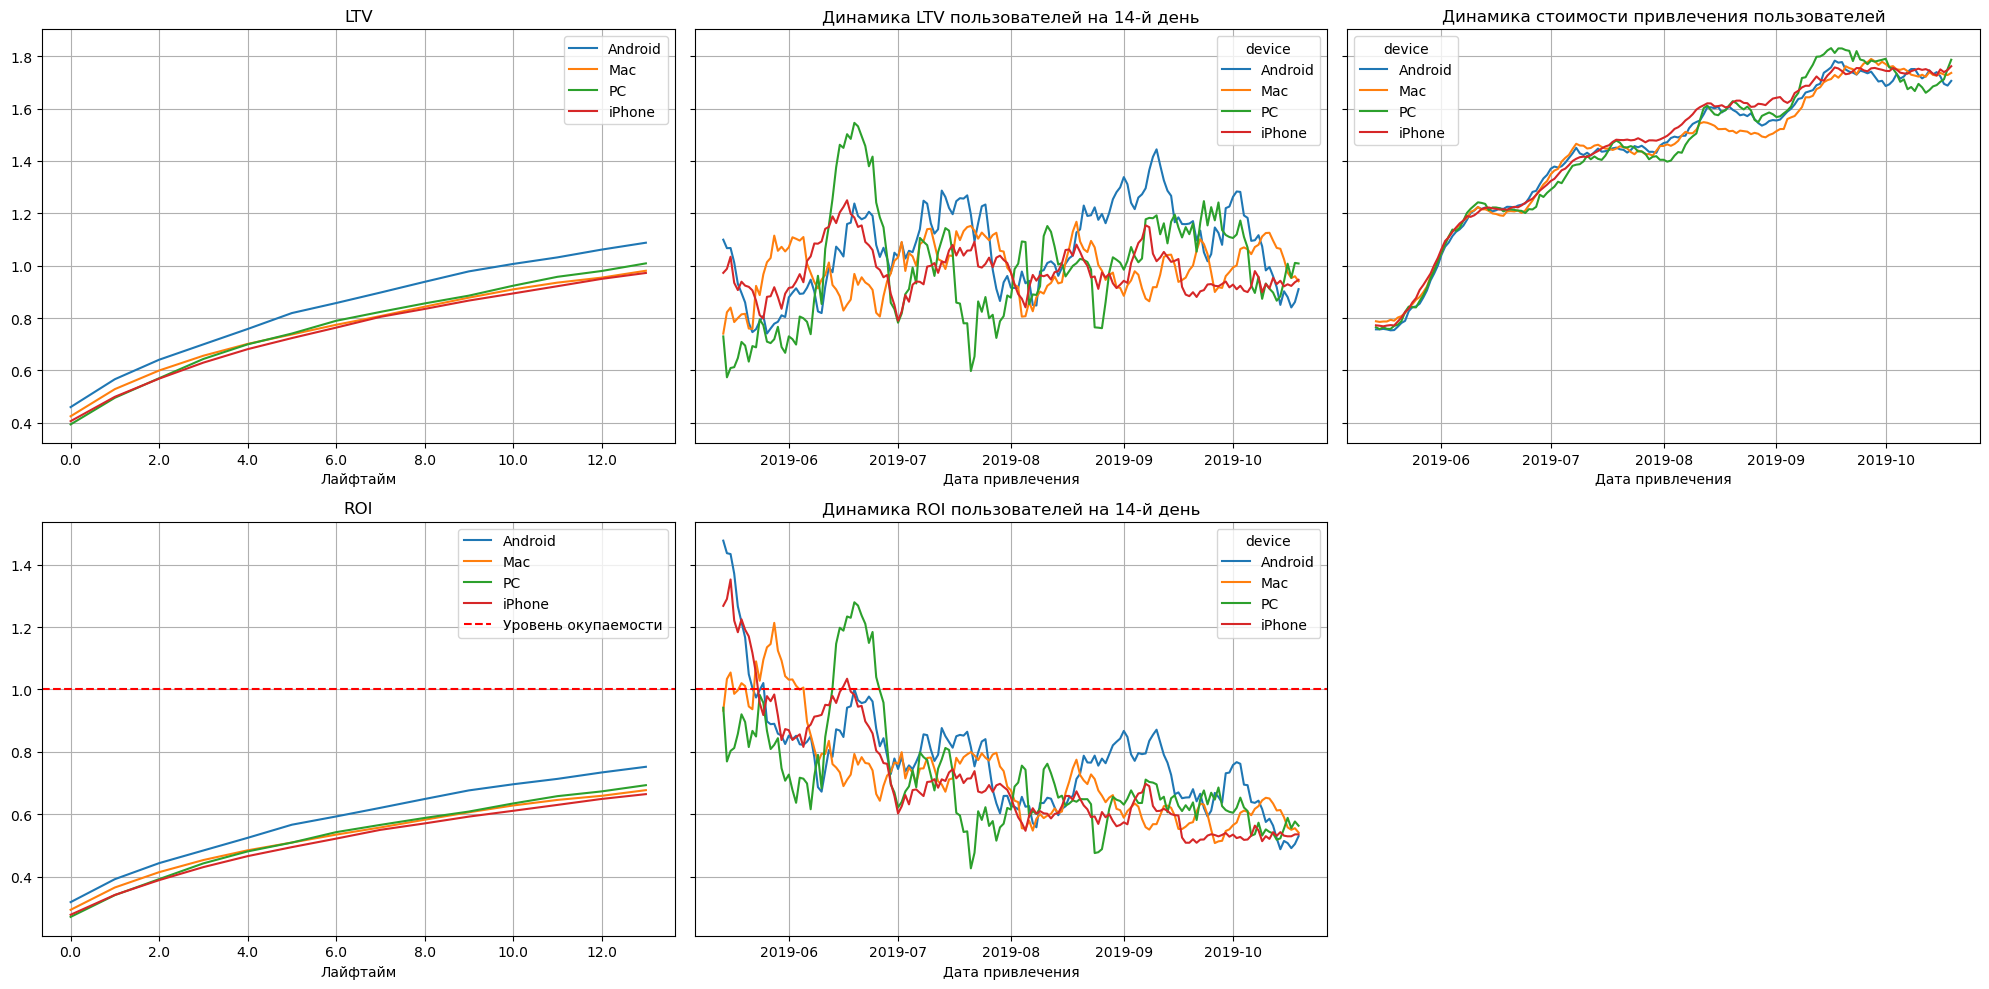

In [54]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

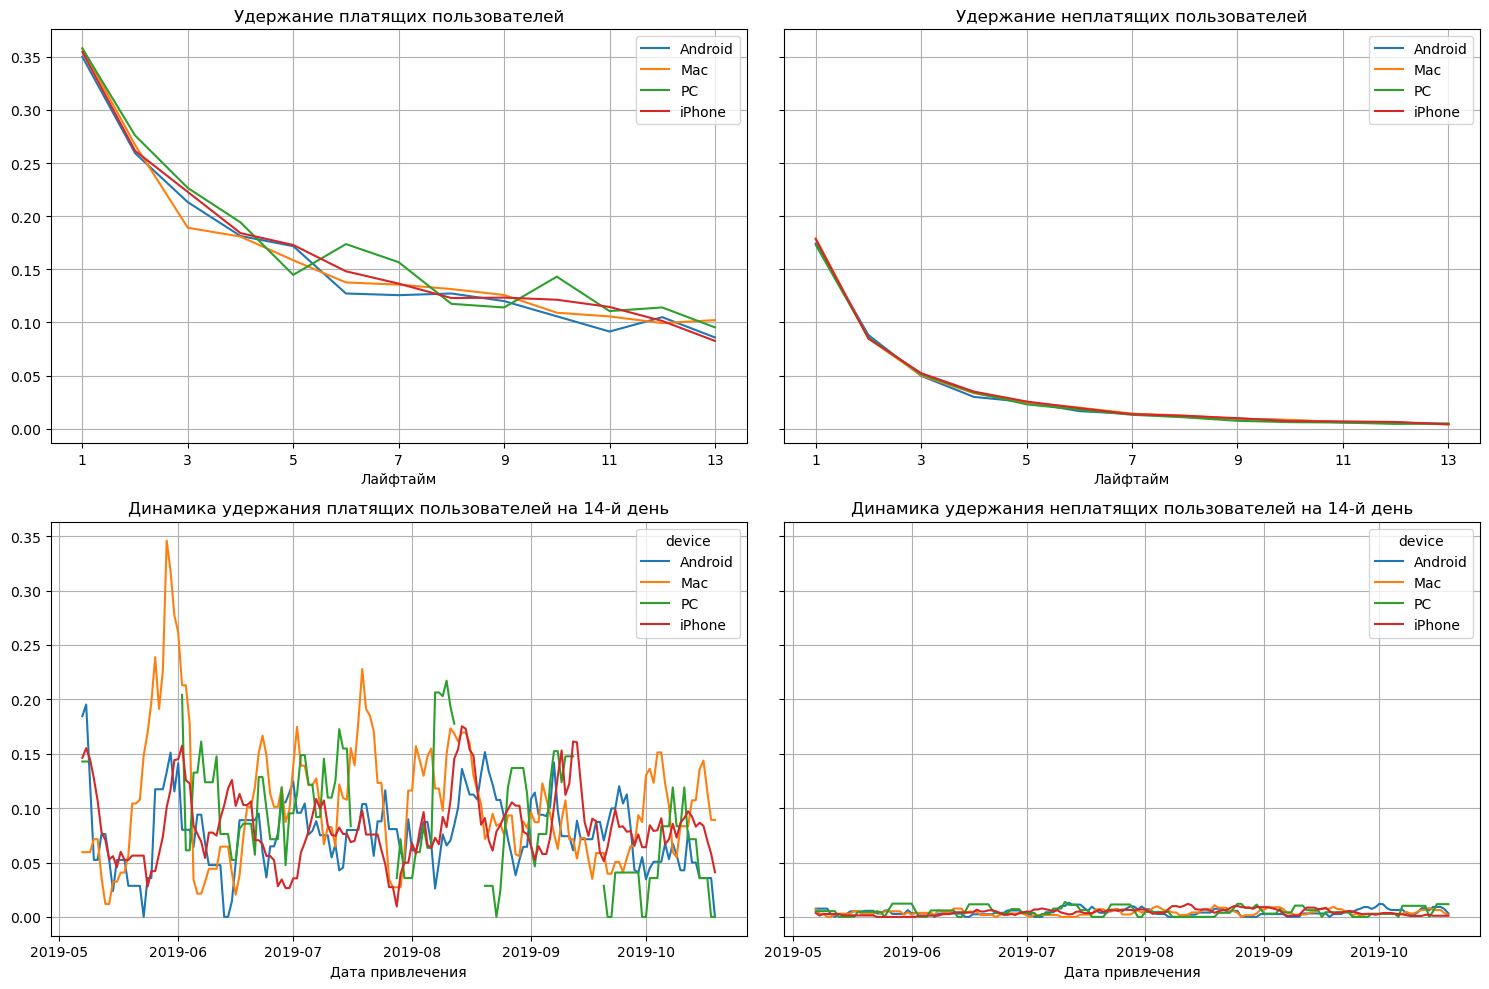

In [55]:
# смотрим удержание с разбивкой на платящих и неплатящих по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

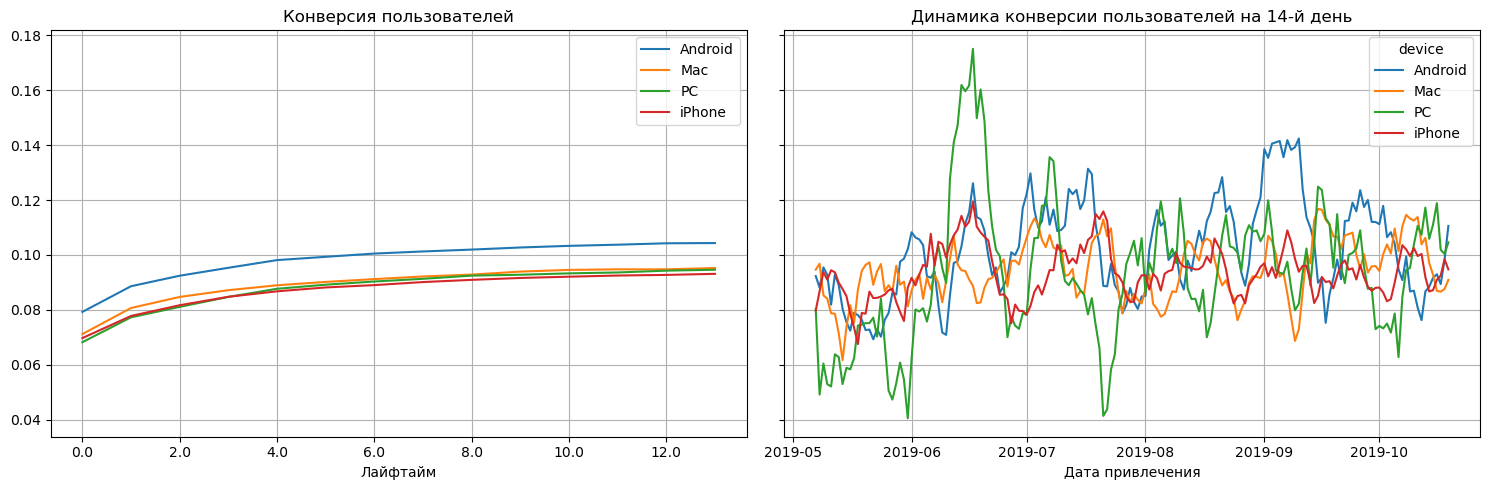

In [56]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам можно сделать такие выводы:
- Реклама не окупается в зависимости. от устройств. ROI на уровне от 65% до 75%.\
- CAC по всем девайсам сильно увеличиваются со временем. Компания значительно увеличила расходы на привлечение пользователя из США.
- LTV достаточно стабилен, выручка у всех пользователей примерно на одном уровне, немного выделяеются лишь пользователи с Android.
- Пользователи с разных девайсов стабильно хорошо удерживаются. Колебания у устройств Mac менее устойчивы, это скорее всего связано с тем, что их количество сильно ниже чем с мобильных устройств.
- У пользователей Android конверсия лучше чем у пользователей с остальных девайсов - на 14-й день примерно на 10%.

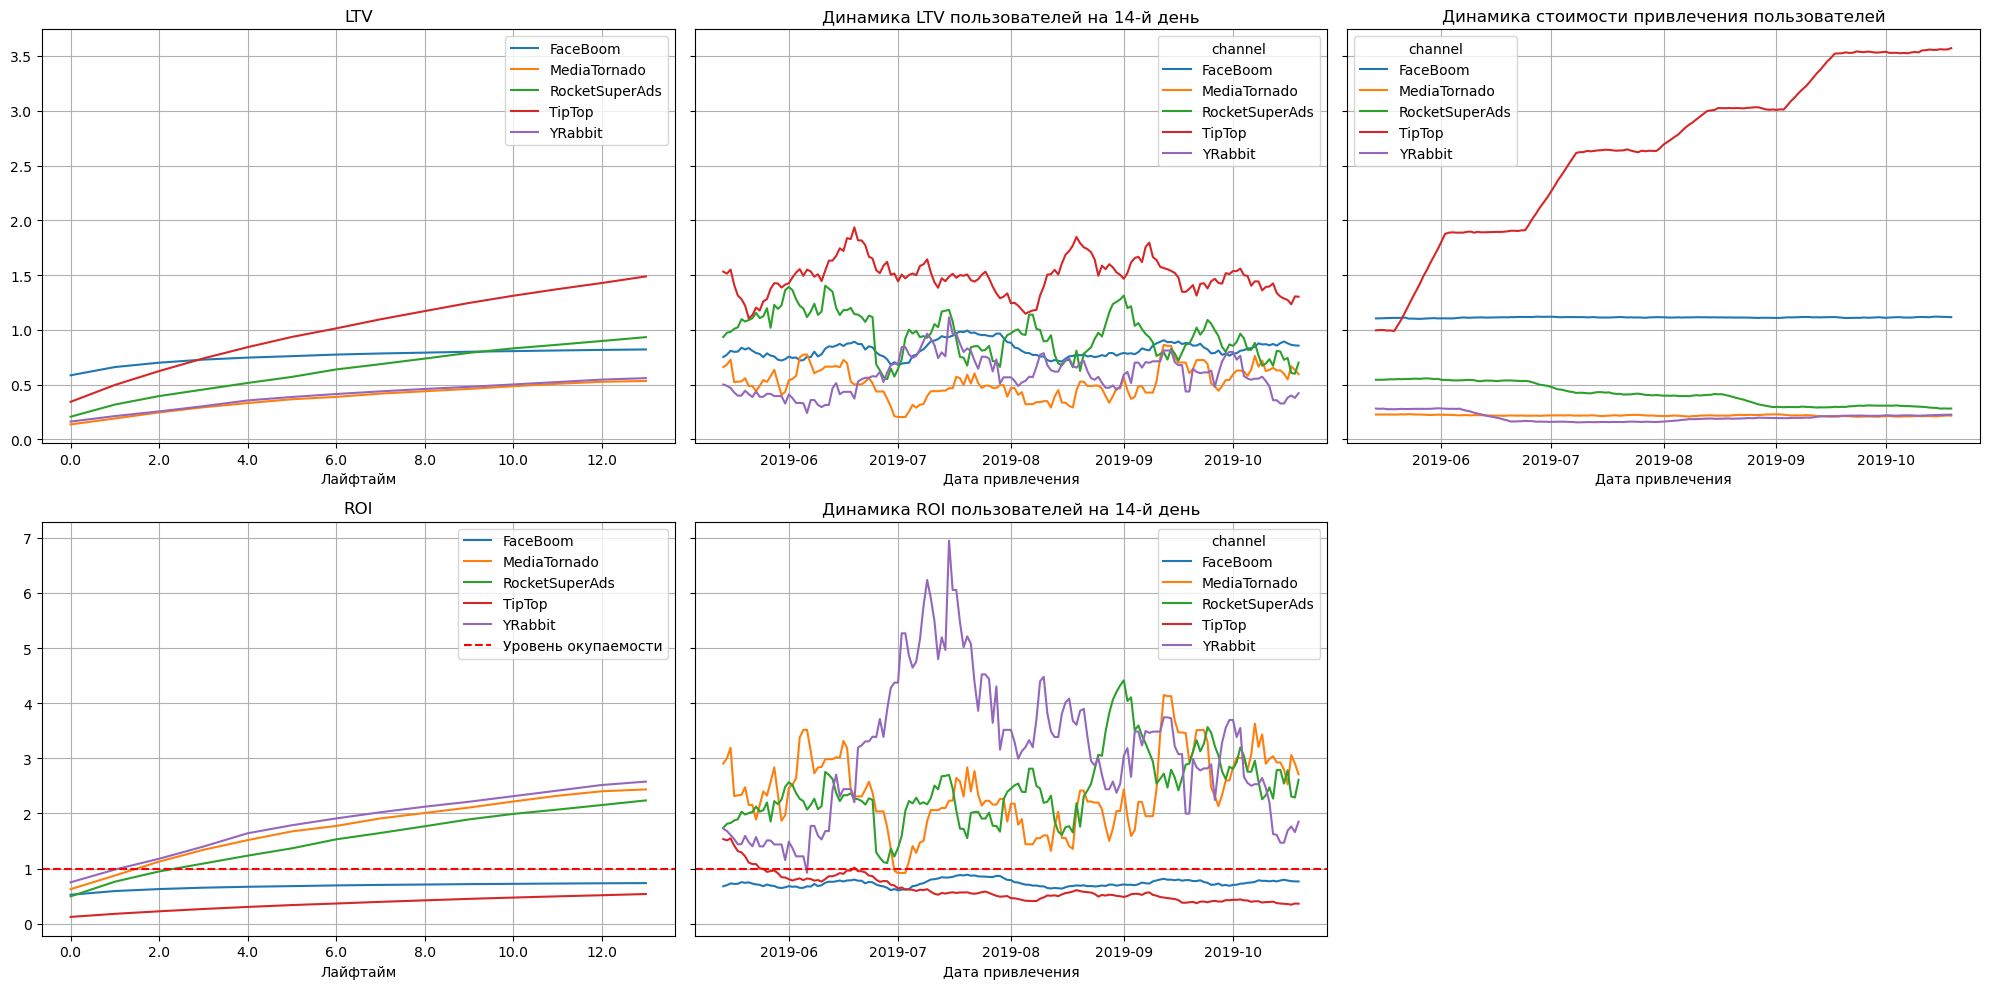

In [57]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

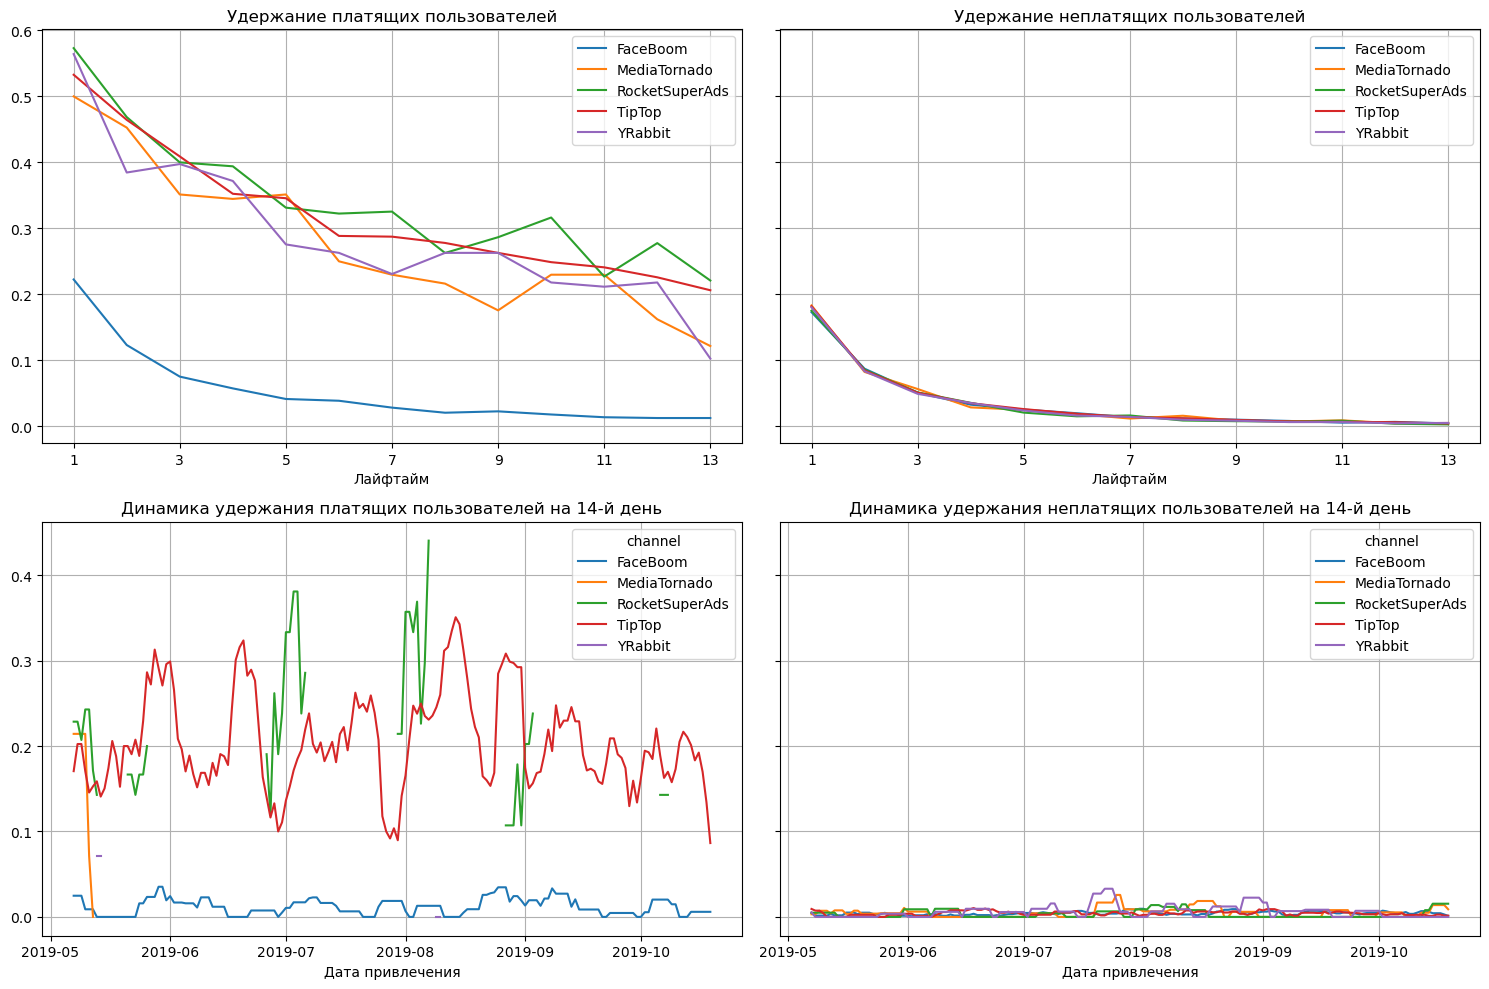

In [58]:
# смотрим удержание с разбивкой на платящих и неплатящих по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

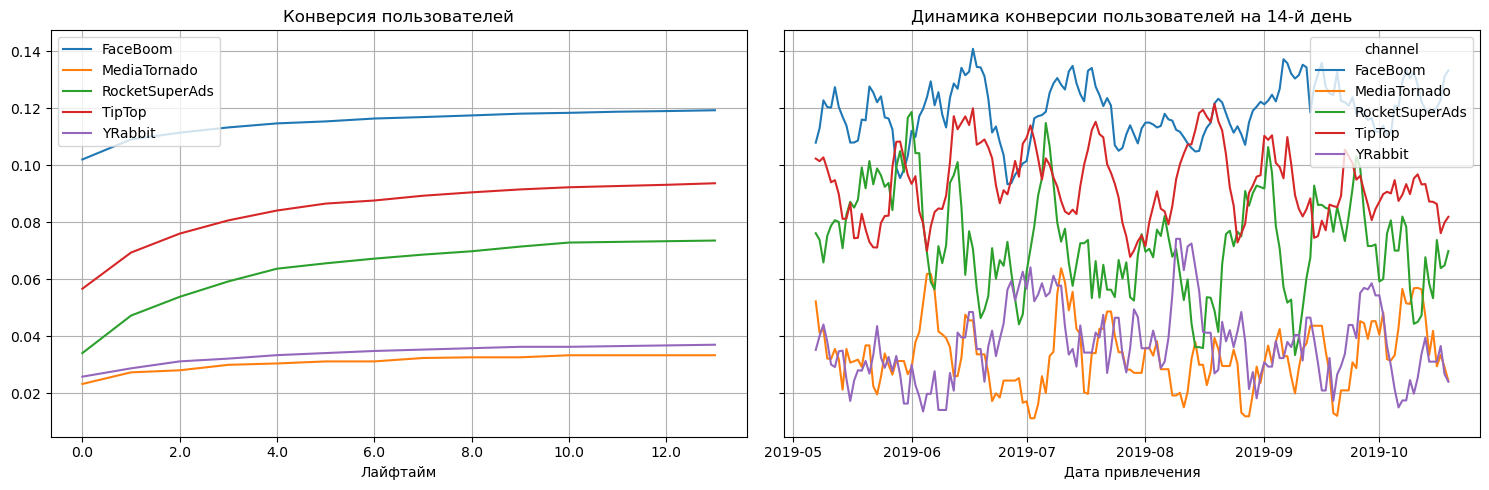

In [59]:
# смотрим конверсию с разбивкой по источникам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

По графикам можно сделать те же выводы, которые были уже сделаны по графикам, где были рассмотрены все страны. Самые проблемные те же 2 канала: TipTop и FaceBoom.
- У канала TipTop со временем многократно увеличиваются расходы на привлечение пользователей с данного канала. ROI находится на недостаточном уровне. Стоит пересмотреть дальнейшие взаимодействия маркетингового отдела с данным каналом.
- У FaceBoom хоть и нет роста расходов на привлечение и держится на стабильном уровне, но все же ROI находится на уровне 85%, а пользователи с данного канала удерживаются хуже всех. Возможно также стоит отказаться от данного канала привлечения и увеличить бюджет на остальные, более прибыльные каналы. 

In [60]:
# Посчитаем общее количество пользователей из США
users_usa = profiles_usa['user_id'].nunique()
users_usa

61829

В США 61,8 тыс пользователей.

In [61]:
# находим количество привлеченных пользователей с каждого рекламного источника из США

cnt_users_usa = (
        profiles_usa.groupby('channel')
        .agg({'user_id': 'count'})
        .sort_values(by='user_id', ascending=False)
)
cnt_users_usa

user_id
channel                
FaceBoom          29144
TipTop            19561
RocketSuperAds     4448
MediaTornado       4364
YRabbit            4312

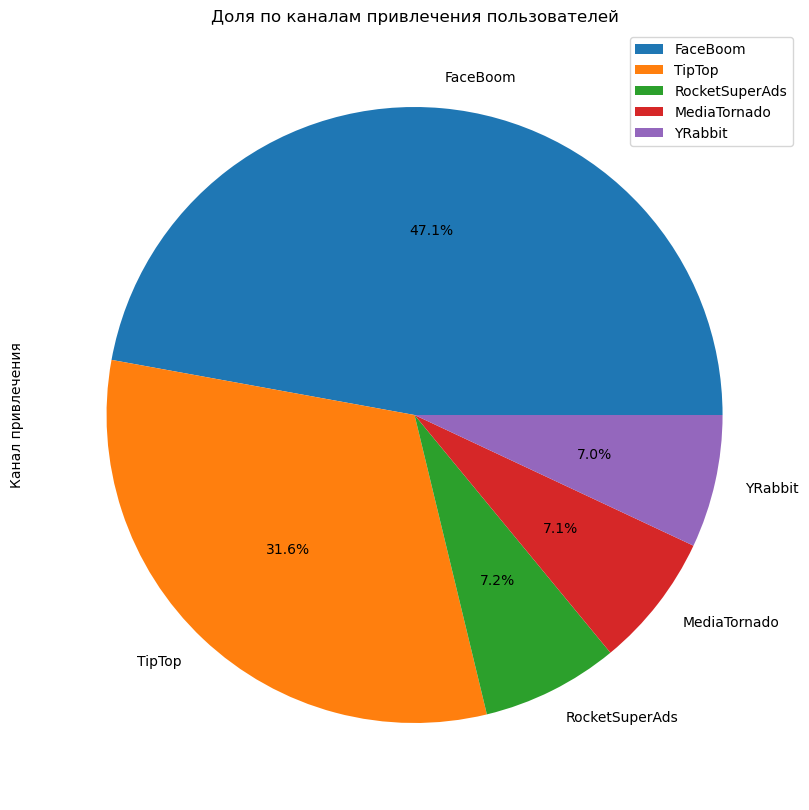

In [62]:
# построим круговую диаграмму по каналам привлечения из США
(cnt_users_usa
 .plot(kind='pie', y='user_id', figsize=(10, 10), autopct='%1.1f%%')
)

# Add labels
plt.title('Доля по каналам привлечения пользователей')
plt.ylabel('Канал привлечения')
plt.show()

Пользователи из США привлеченные с канала FaceBoom составляет 47,1% от общего количества пользователей из США. Хочу напомнить, что расходы в данный канал составляют долю 30,8% от всего бюджета или 32,4 тыс.
Далее идёт канал TipTop с долей в 31,6% от общего количества пользователей из США. В данный канал было вложено 51,9% от всего бюджета или 54,7 тыс.

**Данные два канала занимают более 80% всего бюджета расходов, а показатели намного хуже чем у остальных каналов.**

Далее нужно выяснить какие страны ещё затрагивают данные 2 канала.

In [63]:
print('Общее количество пользователей привлеченных по каналу FaceBoom:',
      profiles[profiles['channel'] == 'FaceBoom']['channel'].count())
      
print('Количество пользователей из США привлеченных по каналу FaceBoom:',
      profiles_usa[profiles_usa['channel'] == 'FaceBoom']['channel'].count())

Общее количество пользователей привлеченных по каналу FaceBoom: 29144
Количество пользователей из США привлеченных по каналу FaceBoom: 29144


Канал привлечения FaceBoom полностью ориентирован на США - все привлеченные пользователи из США.

In [64]:
print('Общее количество пользователей привлеченных по каналу TipTop:',
      profiles[profiles['channel'] == 'TipTop']['channel'].count())

print('Количество пользователей из США привлеченных по каналу TipTop:',
profiles_usa[profiles_usa['channel'] == 'TipTop']['channel'].count())

Общее количество пользователей привлеченных по каналу TipTop: 19561
Количество пользователей из США привлеченных по каналу TipTop: 19561


Канал привлечения TipTop полностью ориентирован на США - все привлеченные пользователи из США.

Таким образом стало понятно, что оба канала ориентированы только на США, и теперь стало понятно почему США так сильно выделяется среди остальных стран по доле выделенного бюджета.

Ниже я напишу общий вывод и свои рекомендации по проведенному исследованию.

### Общий вывод

Я проанализировал данные по пользователям приложения Procrastinate Pro+ по странам (США, Великобритания, Франция и Германия), по устройствам (iPhone, Mac, Android, PC), по каналам привлечения и сделал следующие выводы:

- По странам

США находится на первом месте по количеству пользователей (100 тыс. человек), что составляет 66,7% и существенно обгоняет все остальные страны. При этом доля платящих пользователей - 6,9%.\
По графикам видно, что затраты на рекламу окупаются во всех странах, кроме США, что связано с большими вливаниями (которые занимают 80% от всех расходов) в 2 канала: TipTop и FaceBoom.\
Платящие пользователи из США плохо удерживаются, а конверсия у пользователей из США наоборот выше, чем у пользователей из остальных стран, примерно на 40%.

- По устройствам

iPhonе опережает среди устройств, доля которого составляет - 36%. Далее идут пользователи Android, доля которых составляет 23%, пользователи PC (20%), Mac (20%).\
Затраты на рекламу окупаются только у пользователей Android PC (ROI - 105%), но конверсия у них хуже  - на 14-й день примерно на 15% ниже чем у пользователей с остальных девайсов.

- По каналам привлечения

Органические пользователи лидируют, доля составляет 37,6% от общего количества пользователей, от платящих пользователей - 2%. Канал TipTop является самым расходным каналом, доля которого составляет 19,4% от общего количества пользователей и 12% от платящих пользователей, привлечение одного пользователя обошлось в среднем в 2,76 у.е.\
Затраты на рекламу окупаются у всех каналов, кроме трех: AdNonSense (ROI - 90%), FaceBoom (ROI - 85%), TipTop (ROI - 60%). У платных пользователей из каналов AdNonSense и FaceBoom - худшие показатели удержания и лучшие показатели конверсии.

- В общем и целом

Проанализировав данные, можно сказать, что реклама в привлечение пользователей по основным каналам привлечения (TipTop, FaceBoom) является нерентабельным. Основной проблемой является огромное увеличение расходов на привлечение пользователей по указанным каналам.\
Отделу маркетинга рекомендуется сократить излишние расходы на пользователей из США, каналы TipTop, FaceBoom и на девайсы Apple (iPhone и Mac). Следует направить освободившийся бюджет на более перспективные каналы и страны.\
Например, в разрезе по устройствам расходы окупились в основном у пользователей PC, в разрезе по странам - у пользователей из Франции, Германии и Великобритании. ROI 7 каналов из 10 оказались выше уровня окупаемости.